In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files


In [ ]:
!cp /content/drive/MyDrive/thesis.py /content

In [ ]:
import thesis
#def IMPORT():
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Thesis Dataset/EUR_USD_15min.csv')
df.dropna(inplace=True)
df['timestamp'] = pd.to_datetime(df['timestamp'], infer_datetime_format=True)

df.set_index('timestamp', inplace=True)
print(df.shape)
df.head()

(74270, 4)


,open,close,low,high
timestamp,,,,
2020-01-01 17:00:00,1.12120,1.12127,1.12106,1.12139
2020-01-01 17:15:00,1.12127,1.12146,1.12127,1.12154
2020-01-01 17:30:00,1.12147,1.12154,1.12138,1.12156
2020-01-01 17:45:00,1.12155,1.12143,1.12143,1.12166
2020-01-01 18:00:00,1.12143,1.12202,1.12142,1.12218


In [ ]:
df=thesis.AddingColumn(df)
print(df.shape)
df.head()

(74269, 12)


/content/thesis.py:42: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['week'] = df.index.week


,open,close,low,high,previous_close,hour,day,week,momentum,avg_price,range,ohlc_price
timestamp,,,,,,,,,,,,
2020-01-01 17:00:00,1.12120,1.12127,1.12106,1.12139,1.12146,17,2,1,-0.00007,1.121225,0.00033,1.121230
2020-01-01 17:15:00,1.12127,1.12146,1.12127,1.12154,1.12154,17,2,1,-0.00019,1.121405,0.00027,1.121385
2020-01-01 17:30:00,1.12147,1.12154,1.12138,1.12156,1.12143,17,2,1,-0.00007,1.121470,0.00018,1.121487
2020-01-01 17:45:00,1.12155,1.12143,1.12143,1.12166,1.12202,17,2,1,0.00012,1.121545,0.00023,1.121517
2020-01-01 18:00:00,1.12143,1.12202,1.12142,1.12218,1.12210,18,2,1,-0.00059,1.121800,0.00076,1.121762


In [ ]:
df=thesis.ApplyPCA(df)
df.head()

,open,close,low,high,previous_close,hour,day,week,momentum,avg_price,range,ohlc_price,pca
timestamp,,,,,,,,,,,,,
2020-01-01 17:00:00,1.12120,1.12127,1.12106,1.12139,1.12146,17,2,1,-0.00007,1.121225,0.00033,1.121230,-25.517569
2020-01-01 17:15:00,1.12127,1.12146,1.12127,1.12154,1.12154,17,2,1,-0.00019,1.121405,0.00027,1.121385,-25.517855
2020-01-01 17:30:00,1.12147,1.12154,1.12138,1.12156,1.12143,17,2,1,-0.00007,1.121470,0.00018,1.121487,-25.517859
2020-01-01 17:45:00,1.12155,1.12143,1.12143,1.12166,1.12202,17,2,1,0.00012,1.121545,0.00023,1.121517,-25.517918
2020-01-01 18:00:00,1.12143,1.12202,1.12142,1.12218,1.12210,18,2,1,-0.00059,1.121800,0.00076,1.121762,-25.518215


In [ ]:
X = df.drop('close', axis=1)
print(X.head())
y=pd.DataFrame(df['close'])
print(y.head())

                        open      low     high  previous_close  hour  day  \
timestamp                                                                   
2020-01-01 17:00:00  1.12120  1.12106  1.12139         1.12146    17    2   
2020-01-01 17:15:00  1.12127  1.12127  1.12154         1.12154    17    2   
2020-01-01 17:30:00  1.12147  1.12138  1.12156         1.12143    17    2   
2020-01-01 17:45:00  1.12155  1.12143  1.12166         1.12202    17    2   
2020-01-01 18:00:00  1.12143  1.12142  1.12218         1.12210    18    2   

                     week  momentum  avg_price    range  ohlc_price        pca  
timestamp                                                                       
2020-01-01 17:00:00     1  -0.00007   1.121225  0.00033    1.121230 -25.517569  
2020-01-01 17:15:00     1  -0.00019   1.121405  0.00027    1.121385 -25.517855  
2020-01-01 17:30:00     1  -0.00007   1.121470  0.00018    1.121487 -25.517859  
2020-01-01 17:45:00     1   0.00012   1.121545  0.00023

In [ ]:
x_train, y_train, x_val, y_val, x_test, y_test = thesis.Train_Val_Test_split_15Min(X,y)

59415
59415
7500
7500
7354
7354


In [ ]:
x_train = x_train.values.astype('float32')
x_train=thesis.NormalizeDataset(x_train)

y_train = y_train.values.astype('float32')
y_train = np.reshape(y_train, (-1, 1))
y_train=thesis.NormalizeDataset(y_train)

x_train.shape



(59415, 12)

In [ ]:
x_val = x_val.values.astype('float32')
x_val=thesis.NormalizeDataset(x_val)

y_val = y_val.values.astype('float32')
y_val = np.reshape(y_val, (-1, 1))
y_val=thesis.NormalizeDataset(y_val)


In [ ]:
x_test = x_test.values.astype('float32')
x_test=thesis.NormalizeDataset(x_test)

y_test = y_test.values.astype('float32')
y_test = np.reshape(y_test, (-1, 1))
y_test=thesis.NormalizeDataset(y_test)

In [ ]:
window=24
x_train, x_val, x_test = thesis.df_to_numpy_array_features(x_train, x_val, x_test, window)
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(59390, 24, 12)
(7475, 24, 12)
(7329, 24, 12)


In [ ]:
y_train, y_val, y_test= thesis.df_to_numpy_array_target(y_train, y_val, y_test, window)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)
y_train

(59390, 1)
(7475, 1)
(7329, 1)


array([[0.43059635],
       [0.42954063],
       [0.4282837 ],
       ...,
       [0.11723852],
       [0.1179924 ],
       [0.1158309 ]], dtype=float32)

In [ ]:
y_train=y_train[:,-1]
y_val=y_val[:,-1]
y_test=y_test[:,-1]
y_train

array([0.43059635, 0.42954063, 0.4282837 , ..., 0.11723852, 0.1179924 ,
       0.1158309 ], dtype=float32)

In [ ]:
model= thesis.GRU_Model(x_train)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 24, 256)           207360    
                                                                 
 gru_1 (GRU)                 (None, 24, 64)            61824     
                                                                 
 dropout (Dropout)           (None, 24, 64)            0         
                                                                 
 gru_2 (GRU)                 (None, 16)                3936      
                                                                 
 dense (Dense)               (None, 32)                544       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 1

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint('/content/drive/MyDrive/modelweights/EUR15minGRU.hdf5', monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
464/464 [==============================] - ETA: 0s - loss: 534.5506 - mae: 7.9598 - mse: 534.5506 - root_mean_squared_error: 23.1203 - mape: 54433.0547
Epoch 1: val_mse improved from inf to 1.73458, saving model to /content/drive/MyDrive/modelweights/EUR15minGRU.hdf5
464/464 [==============================] - 71s 143ms/step - loss: 534.5506 - mae: 7.9598 - mse: 534.5506 - root_mean_squared_error: 23.1203 - mape: 54433.0547 - val_loss: 1.7346 - val_mae: 1.2858 - val_mse: 1.7346 - val_root_mean_squared_error: 1.3170 - val_mape: 235904.4844
Epoch 2/75
464/464 [==============================] - ETA: 0s - loss: 0.6554 - mae: 0.7447 - mse: 0.6554 - root_mean_squared_error: 0.8096 - mape: 19215.0488
Epoch 2: val_mse improved from 1.73458 to 0.37198, saving model to /content/drive/MyDrive/modelweights/EUR15minGRU.hdf5
464/464 [==============================] - 61s 132ms/step - loss: 0.6554 - mae: 0.7447 - mse: 0.6554 - root_mean_squared_error: 0.8096 - mape: 19215.0488 - val_loss: 0

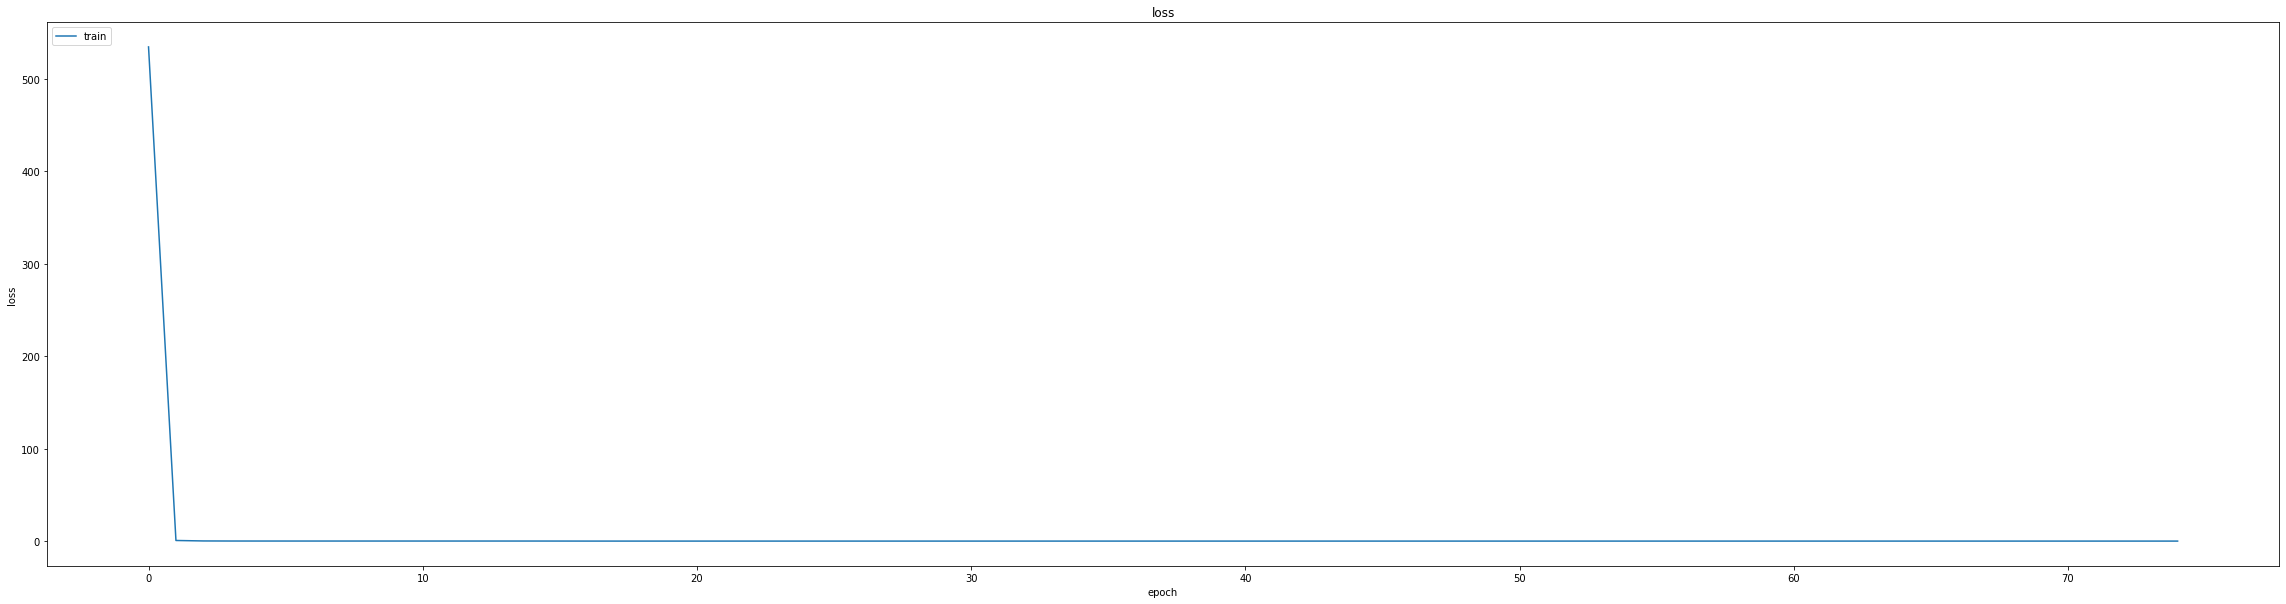

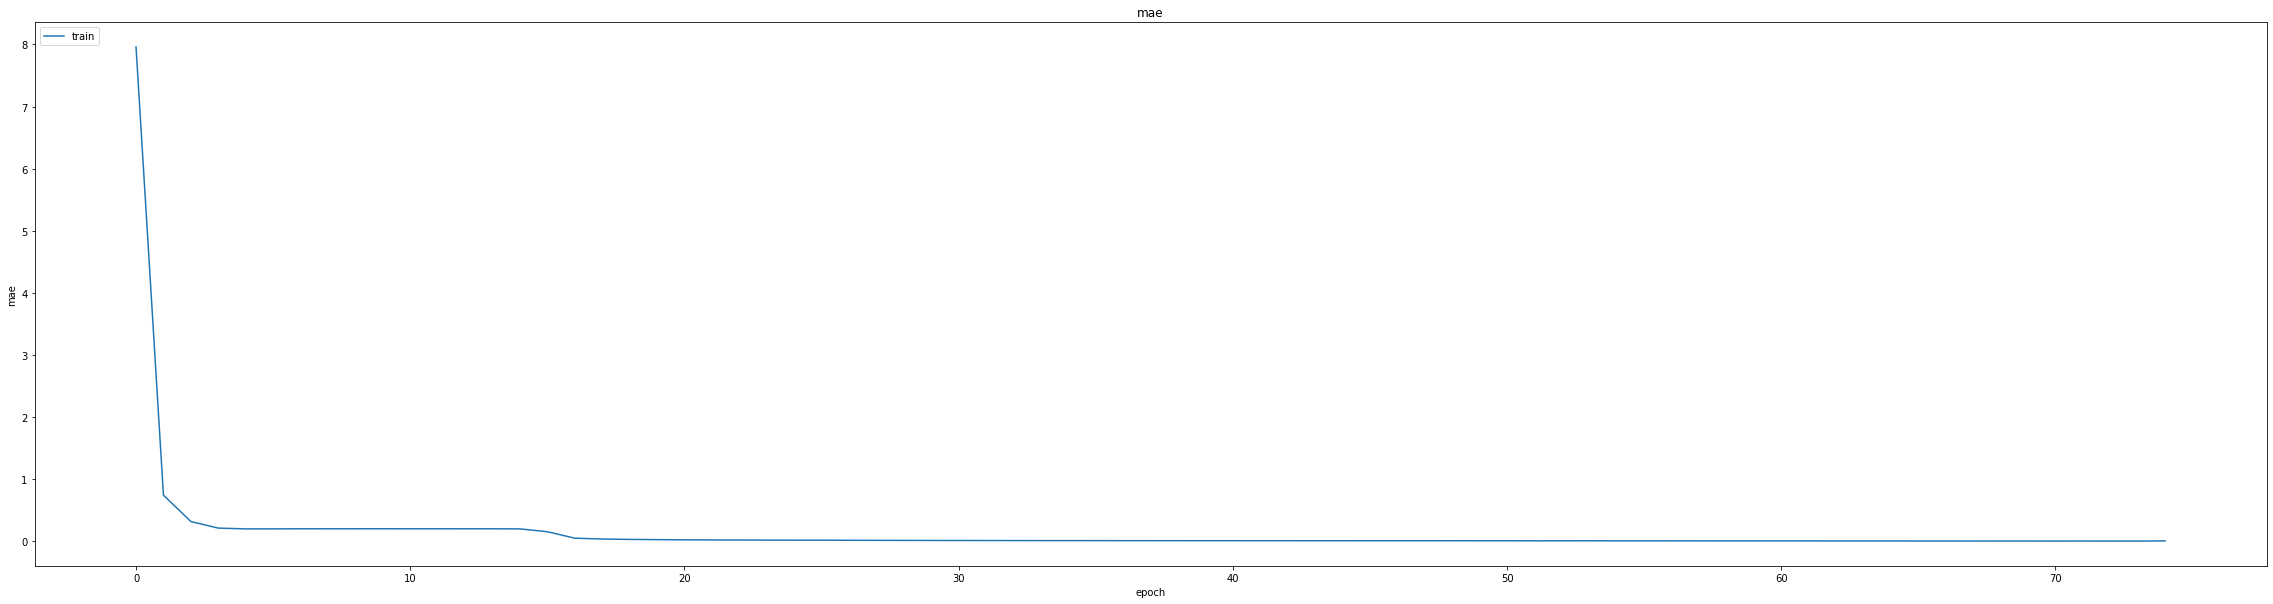

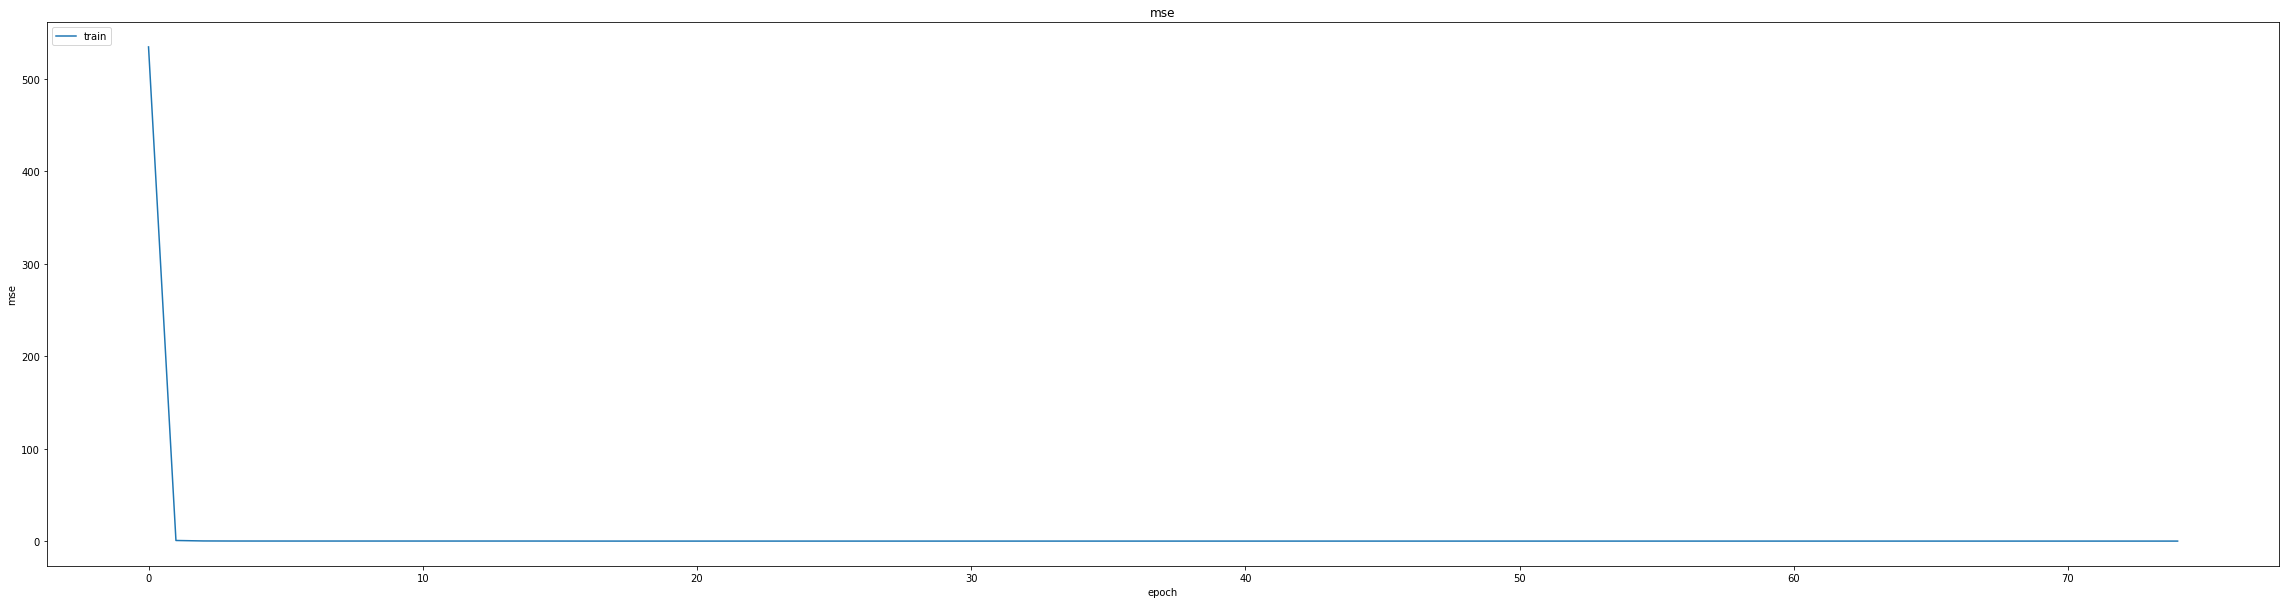

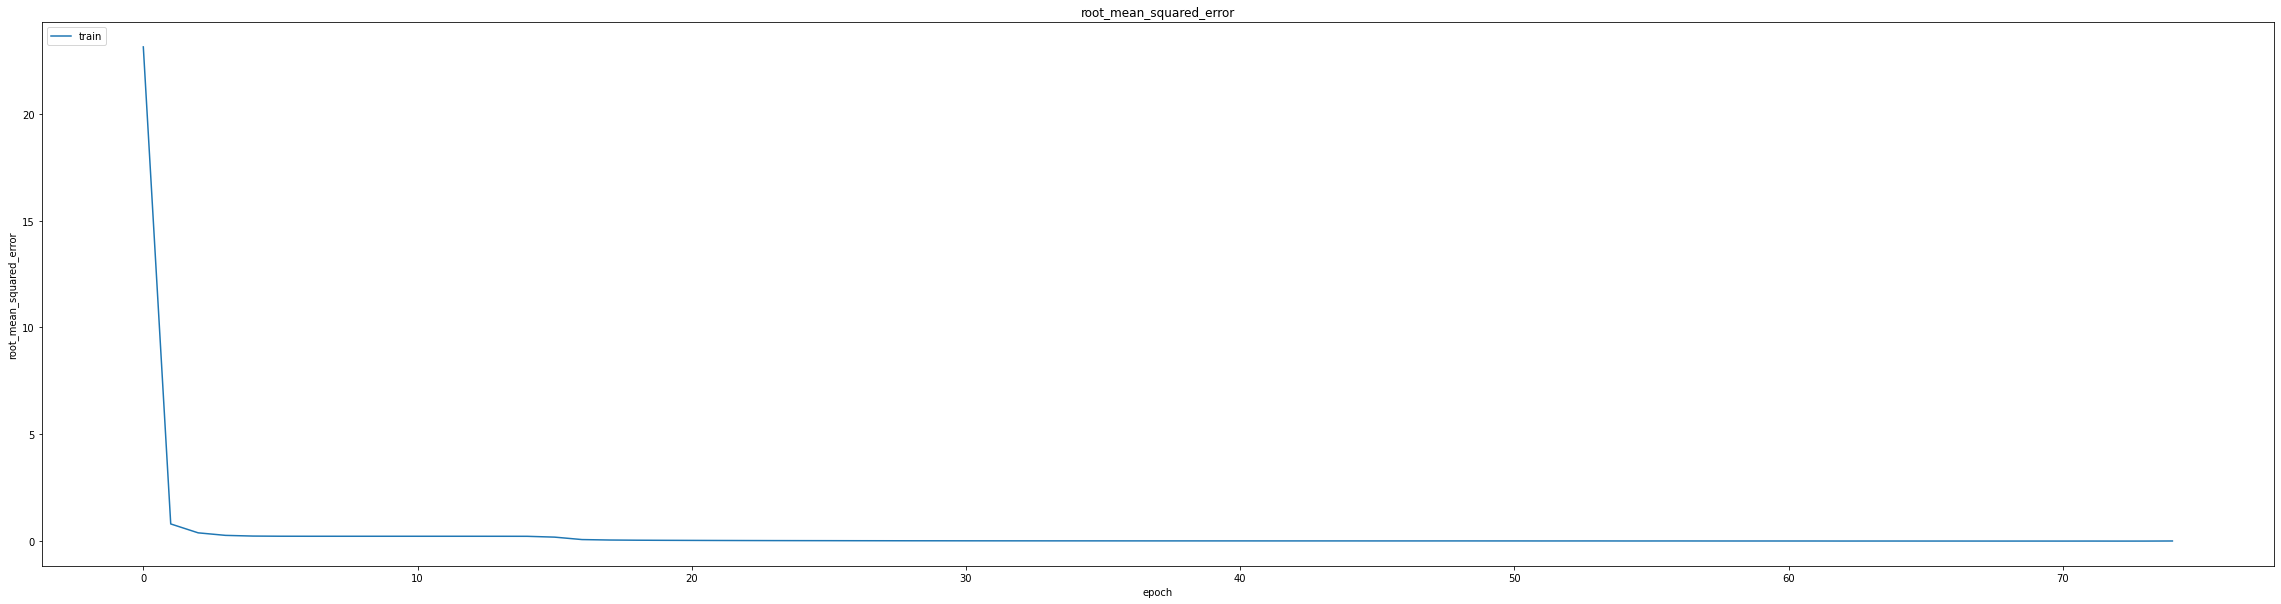

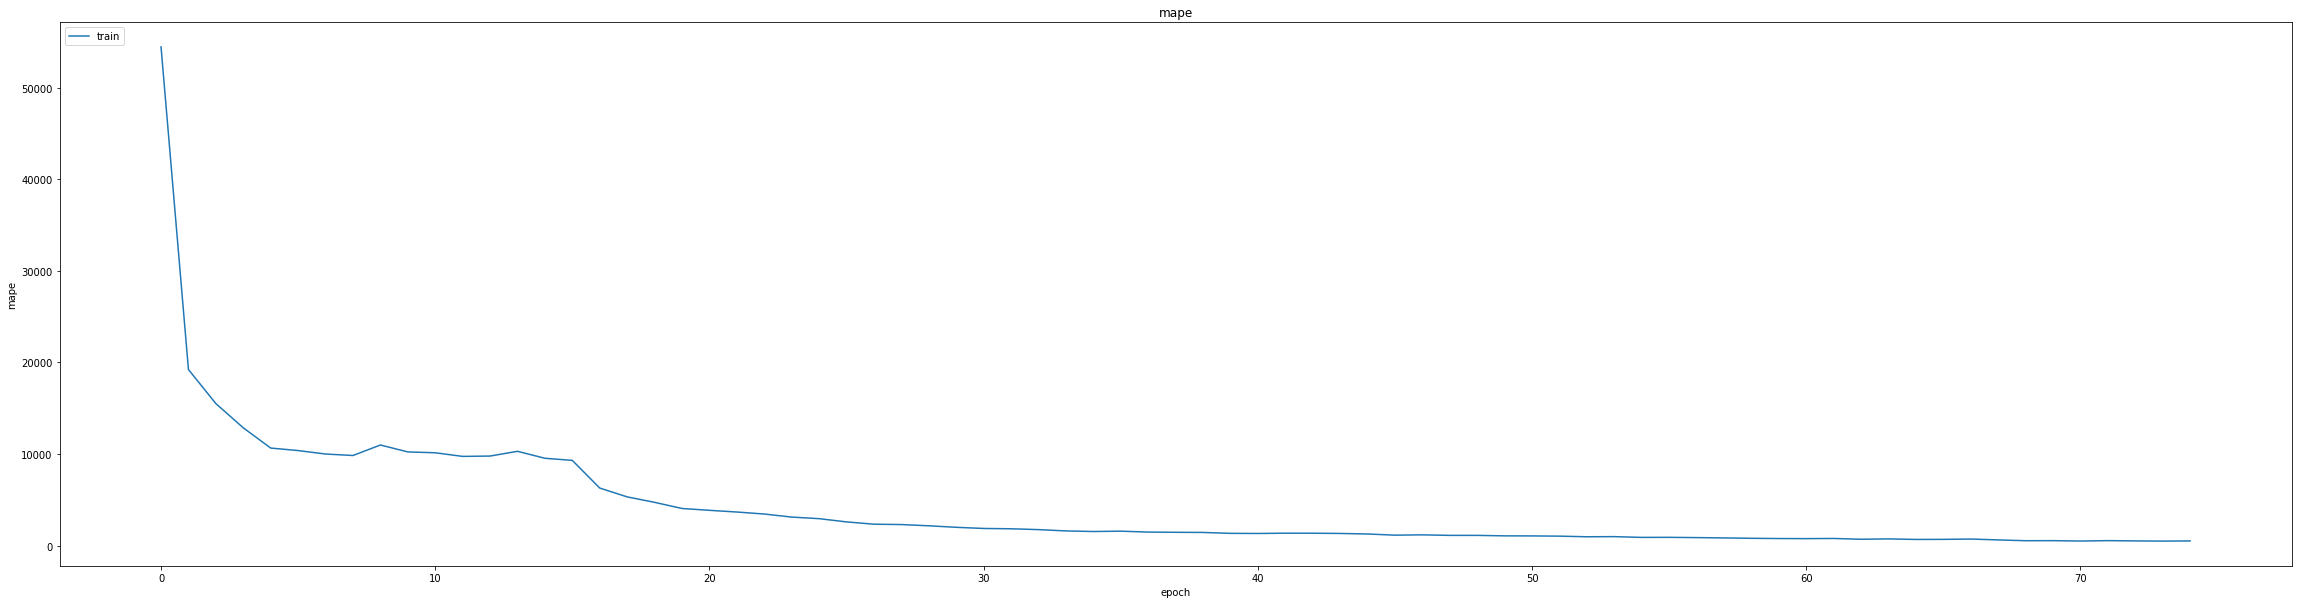

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.02156681939959526
0.02873441018164158
234/234 [==============================] - 4s 15ms/step
0.9861694143237654


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/EUR15minGRU.hdf5")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)
from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25
464/464 [==============================] - ETA: 0s - loss: 3.2277e-04 - mae: 0.0105 - mse: 3.2277e-04 - root_mean_squared_error: 0.0180 - mape: 905.0159
Epoch 1: val_mse did not improve from 0.00083
464/464 [==============================] - 64s 128ms/step - loss: 3.2277e-04 - mae: 0.0105 - mse: 3.2277e-04 - root_mean_squared_error: 0.0180 - mape: 905.0159 - val_loss: 0.0012 - val_mae: 0.0280 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0346 - val_mape: 6203.6152 - lr: 0.0010
Epoch 2/25
464/464 [==============================] - ETA: 0s - loss: 1.1849e-04 - mae: 0.0083 - mse: 1.1849e-04 - root_mean_squared_error: 0.0109 - mape: 803.5667
Epoch 2: val_mse did not improve from 0.00083
464/464 [==============================] - 59s 127ms/step - loss: 1.1849e-04 - mae: 0.0083 - mse: 1.1849e-04 - root_mean_squared_error: 0.0109 - mape: 803.5667 - val_loss: 0.0014 - val_mae: 0.0305 - val_mse: 0.0014 - val_root_mean_squared_error: 0.0368 - val_mape: 5555.4829 - lr: 0.0010
lr c

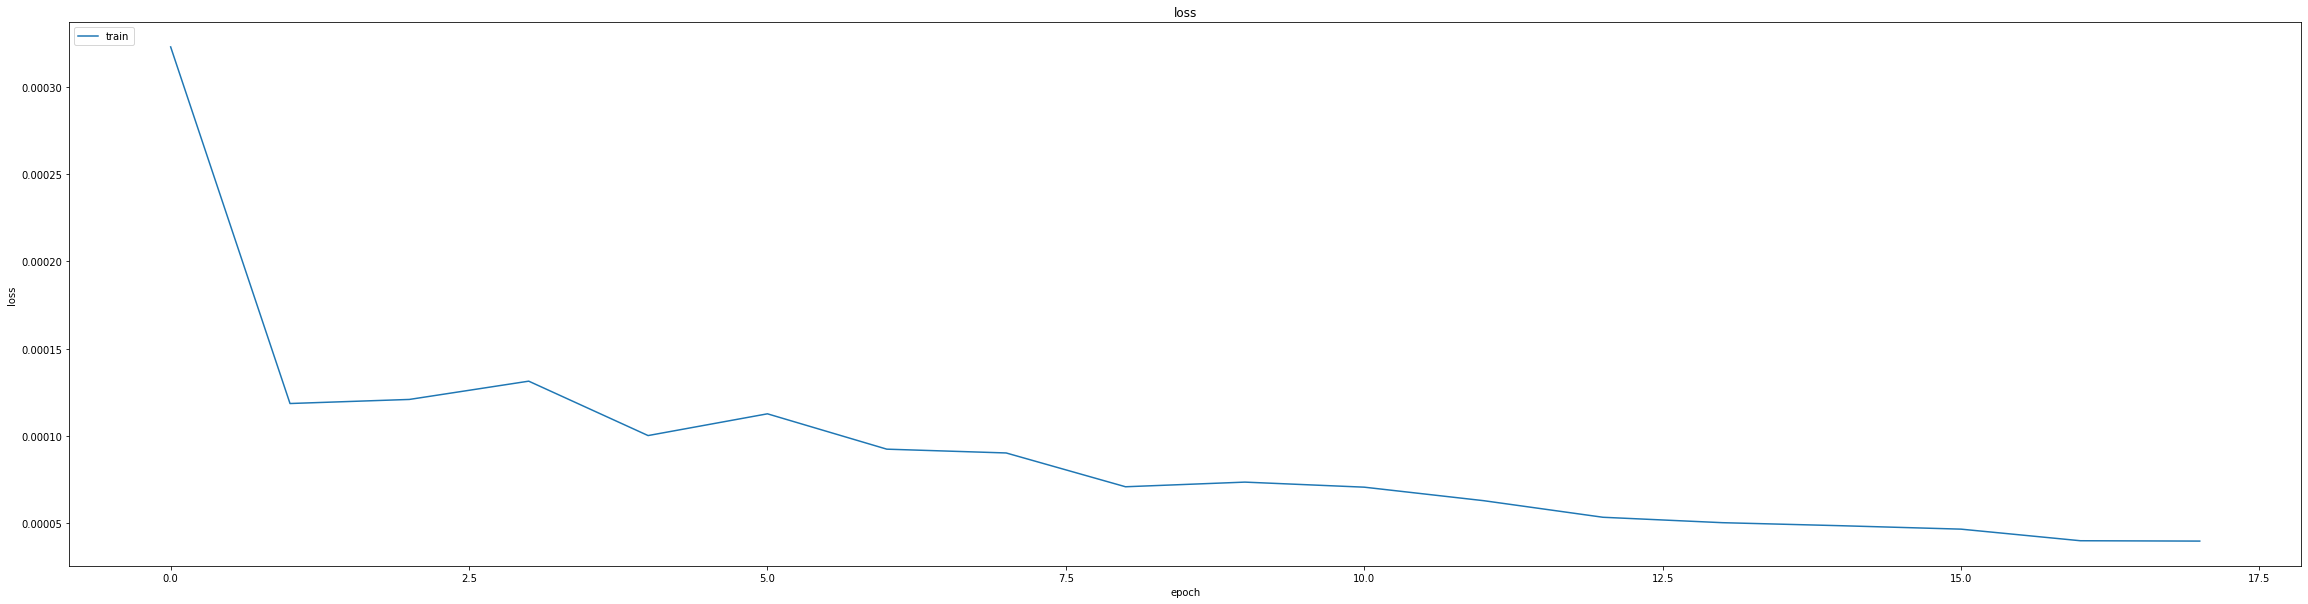

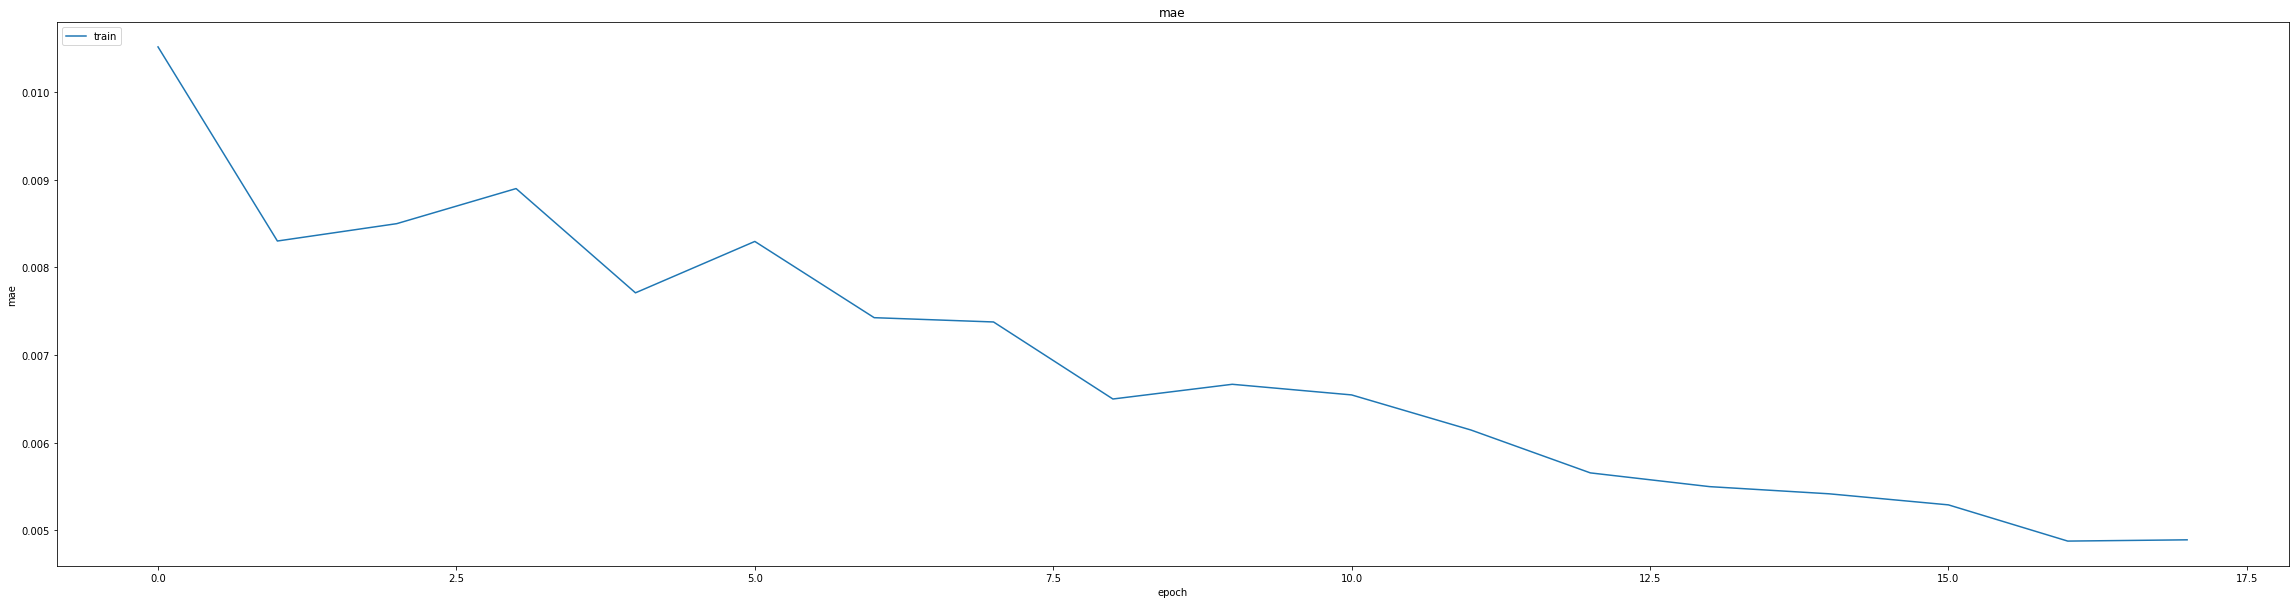

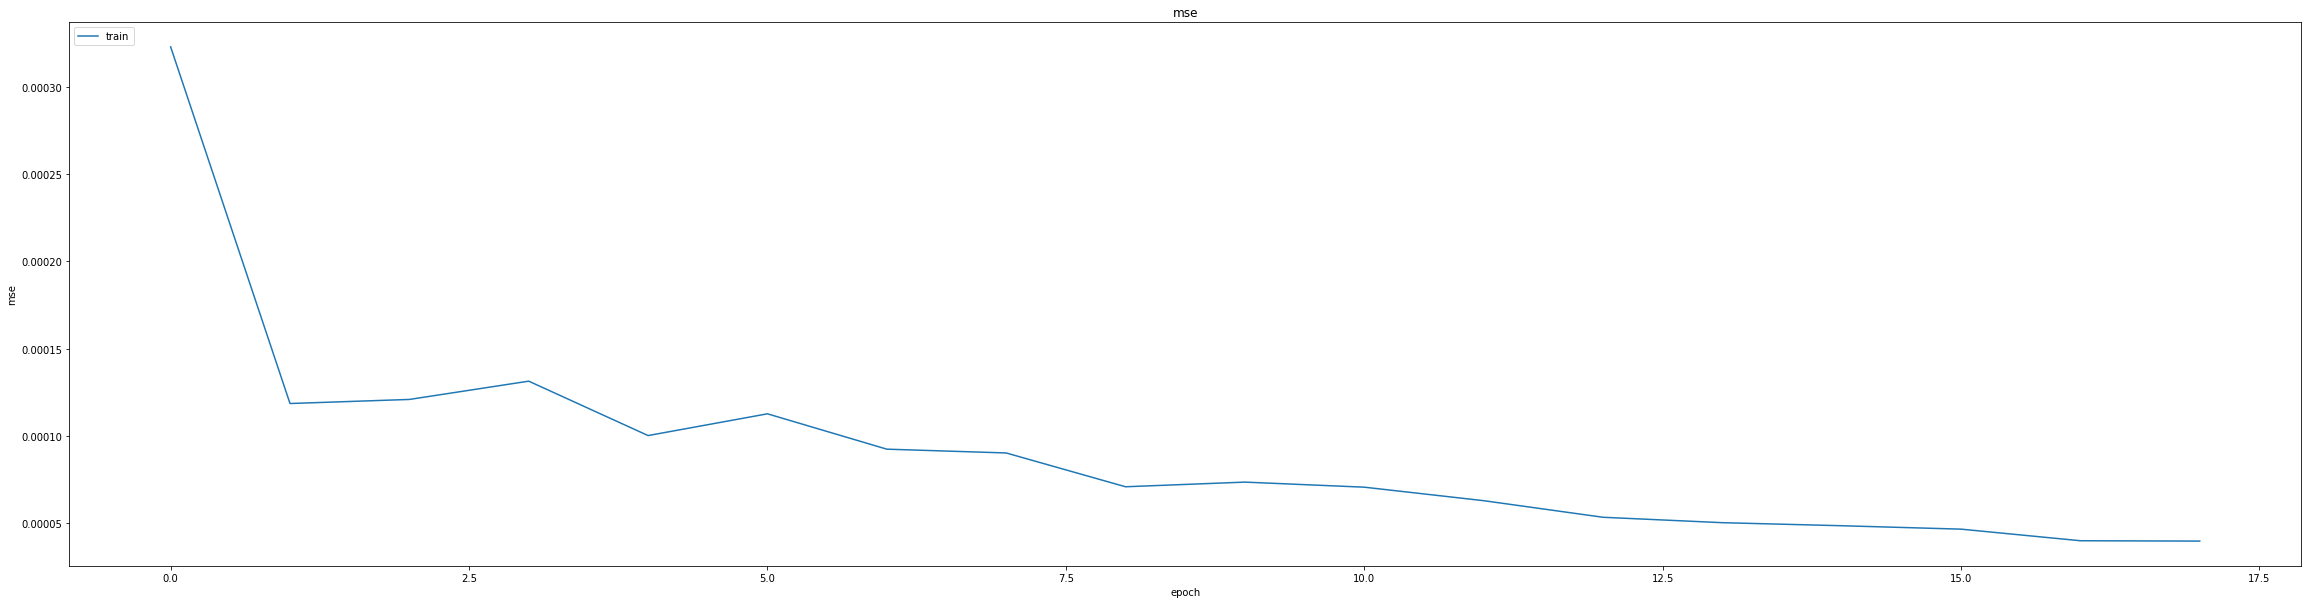

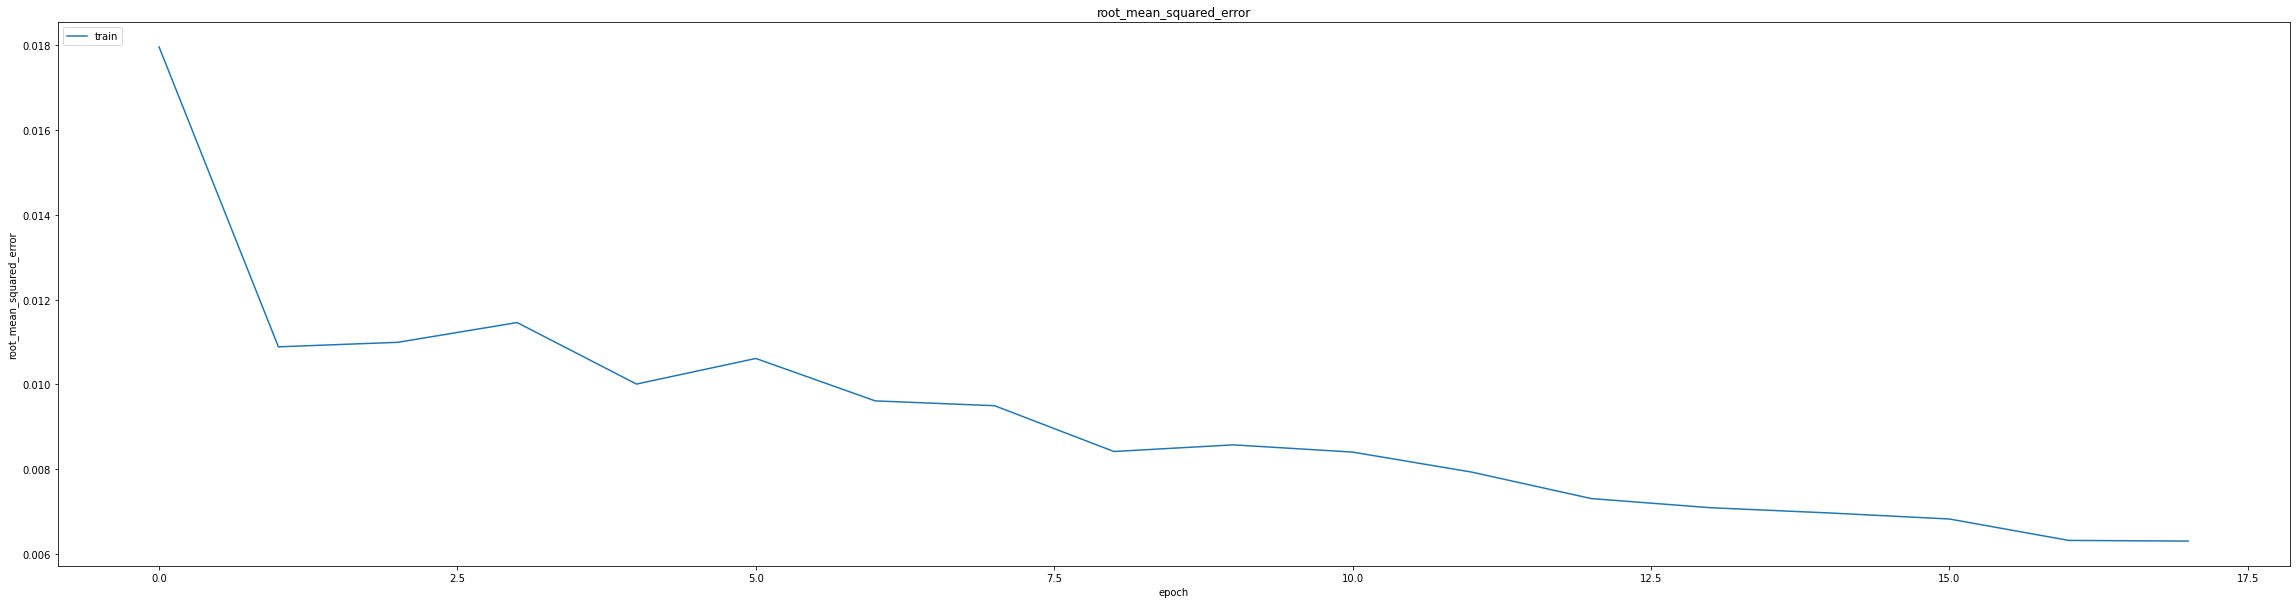

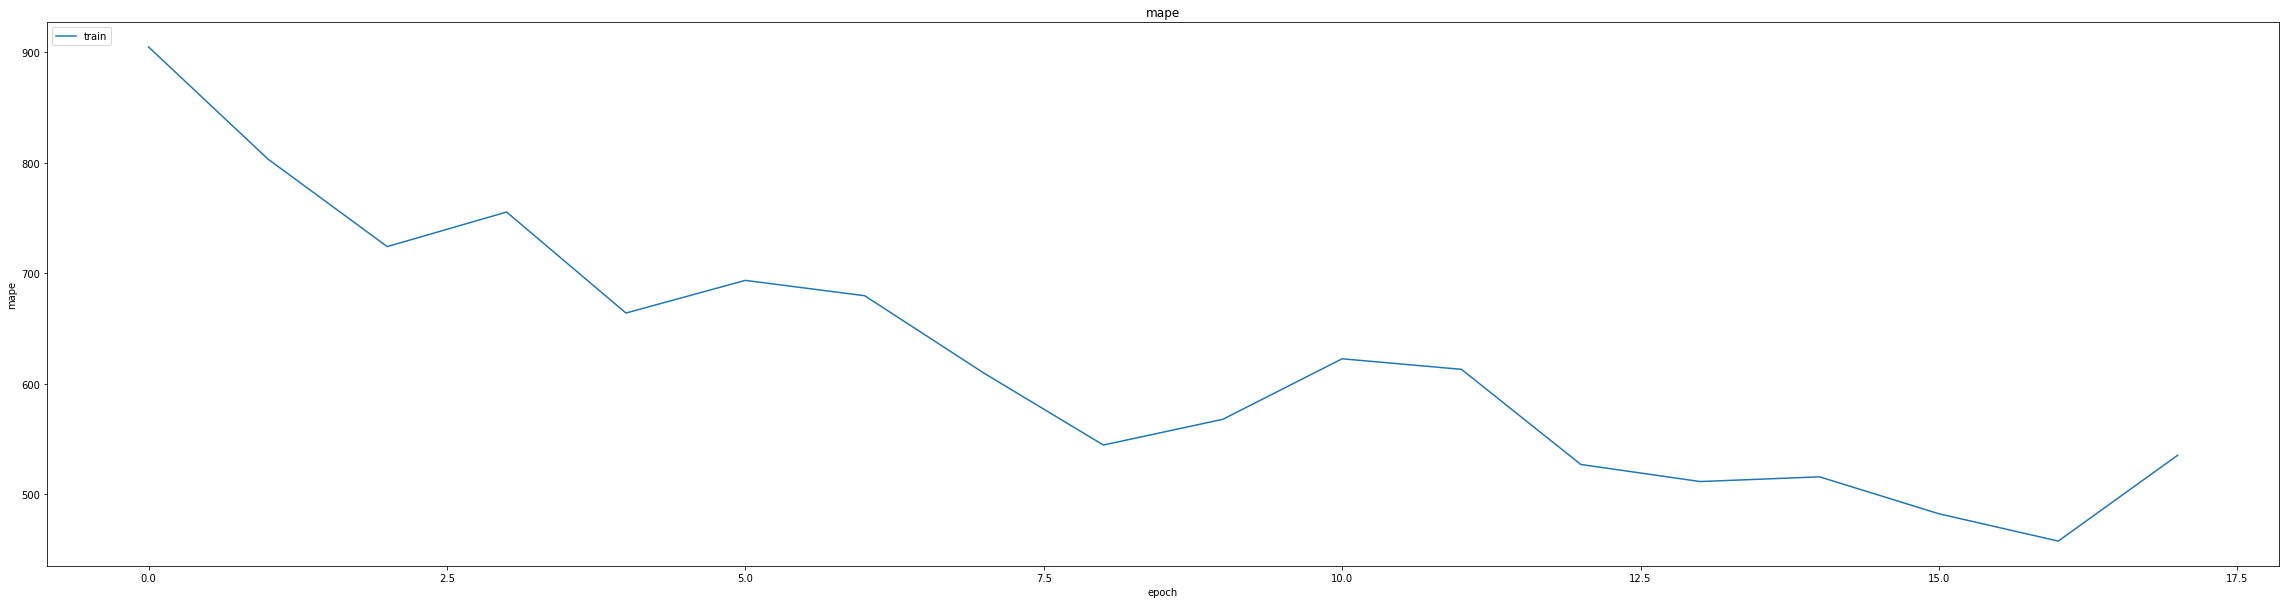

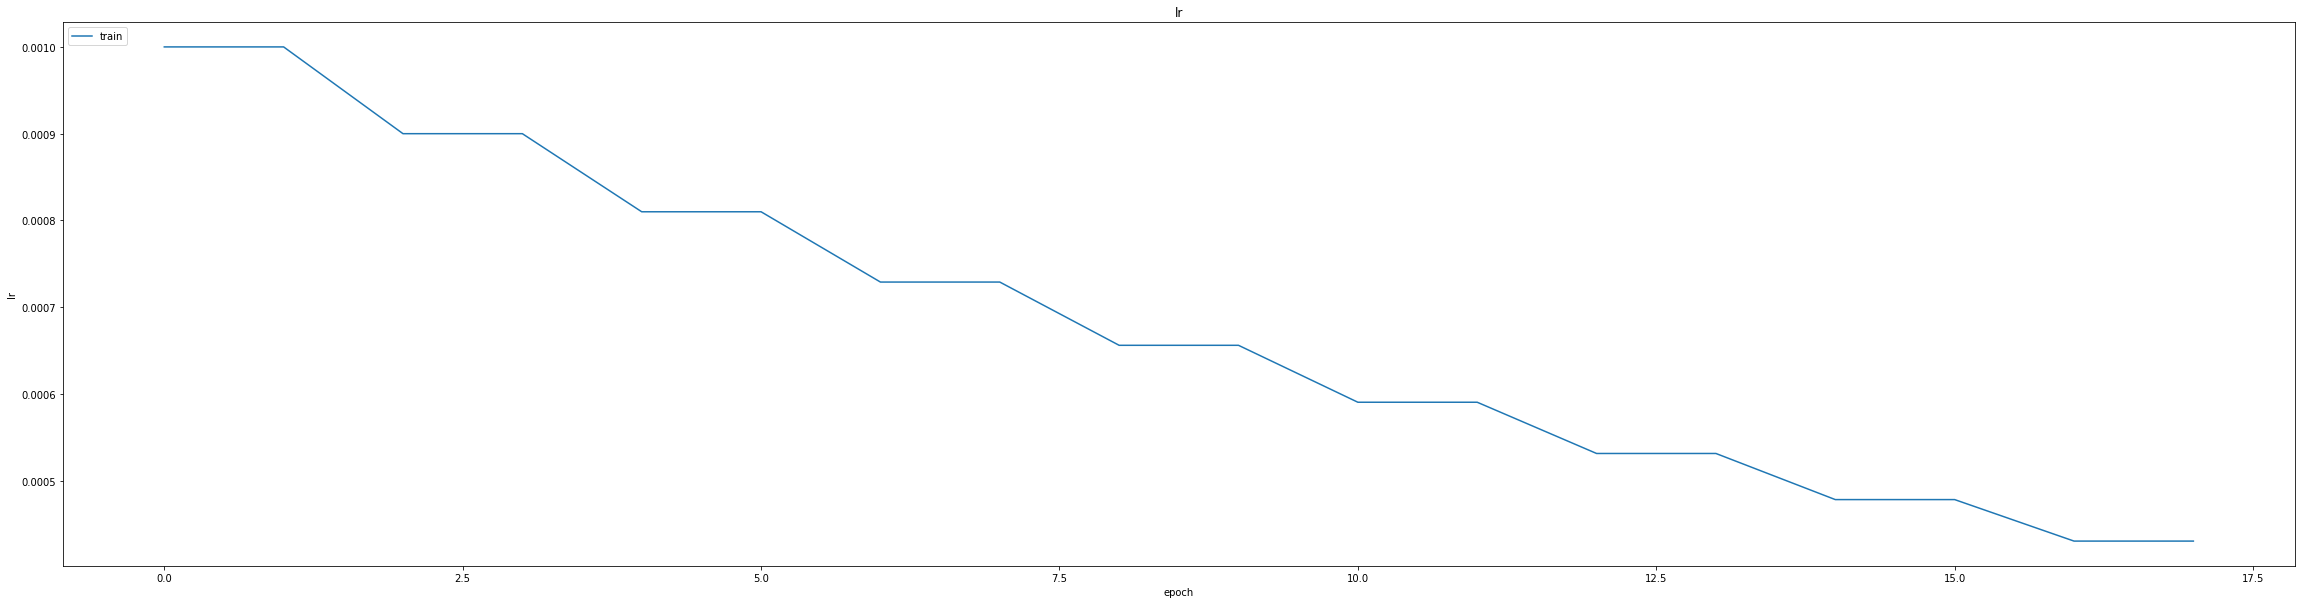

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.024420859292149544
0.030738964676856995
234/234 [==============================] - 4s 15ms/step
0.9685089174113285


234/234 [==============================] - 4s 15ms/step


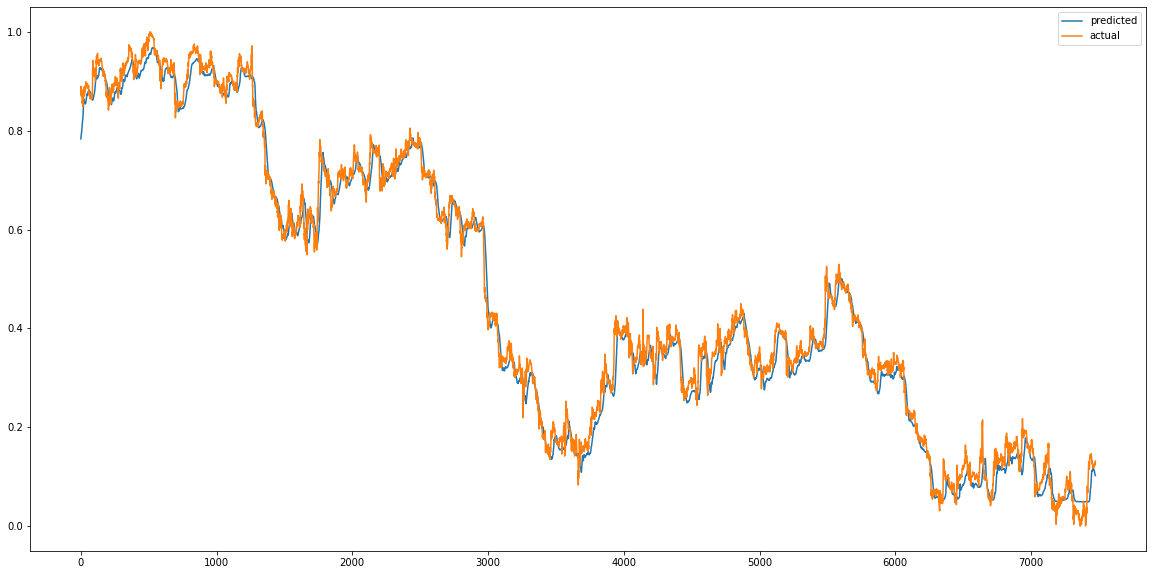

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/EUR15minGRU.hdf5")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


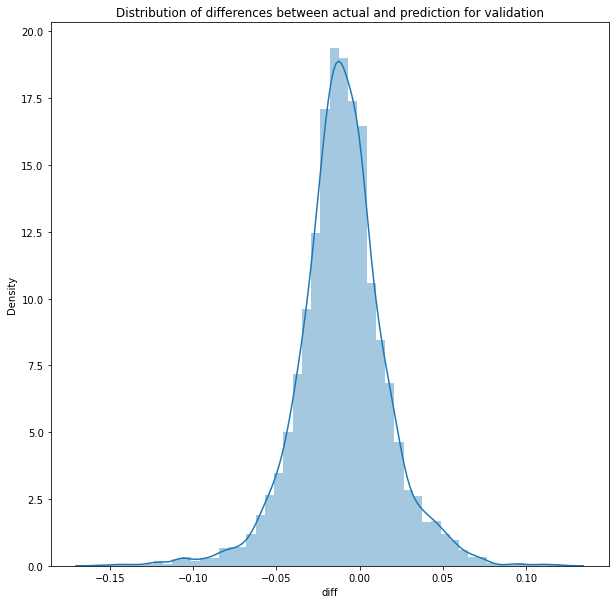

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

230/230 [==============================] - 3s 15ms/step


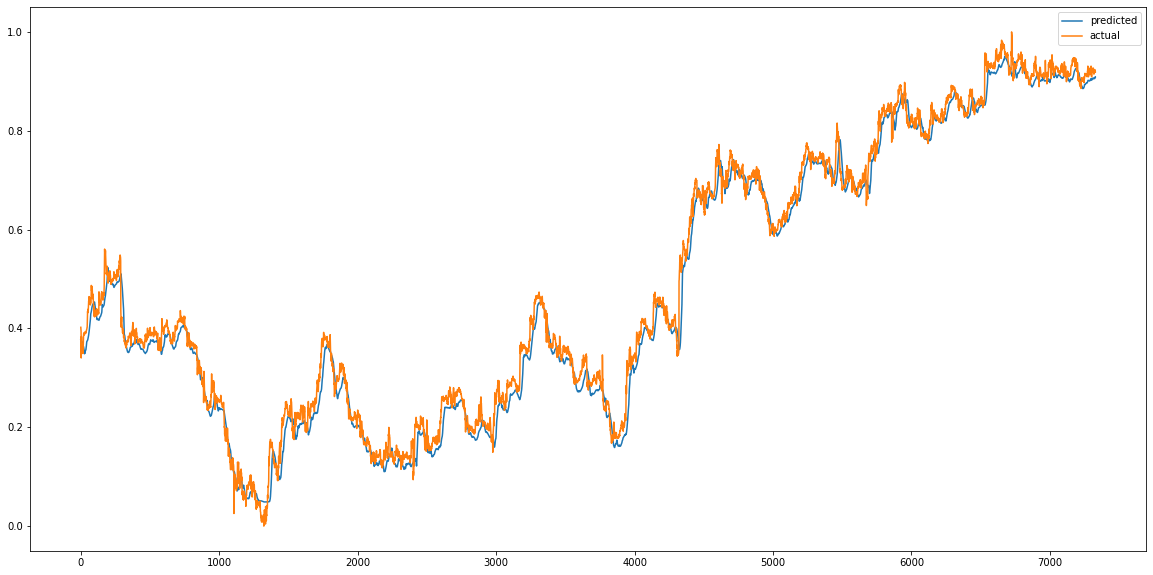

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


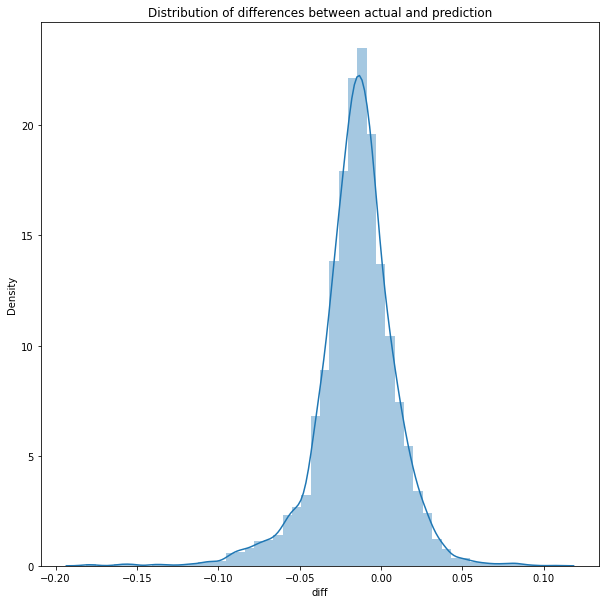

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))
print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))
from math import sqrt

print('RMSE  :', sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

test_r2_scr = thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :',test_r2_scr)


predictions['diff'].describe()

MSE :  0.0008105658864063564
MAE :  0.021343683239658625
RMSE  : 0.028470438816540156
230/230 [==============================] - 3s 15ms/step
R2_Score  : 0.9892238640093238


count    7329.000000
mean       -0.015071
std         0.024156
min        -0.181210
25%        -0.026416
50%        -0.013963
75%        -0.002005
max         0.106166
Name: diff, dtype: float64

In [ ]:
model= thesis.GRU_BiLSTM_Model(x_train)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 24, 32)            4416      
                                                                 
 bidirectional (Bidirectiona  (None, 24, 256)          164864    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 256)           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              164352    
 nal)                                                            
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 dense_1 (Dense)             (None, 16)                5

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("weights.best.hdf5", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
464/464 [==============================] - ETA: 0s - loss: 310.8336 - mae: 2.4910 - mse: 310.8336 - root_mean_squared_error: 17.6305 - mape: 8439.4961
Epoch 1: val_mse improved from inf to 0.08567, saving model to weights.best.hdf5
464/464 [==============================] - 152s 303ms/step - loss: 310.8336 - mae: 2.4910 - mse: 310.8336 - root_mean_squared_error: 17.6305 - mape: 8439.4961 - val_loss: 0.0857 - val_mae: 0.2624 - val_mse: 0.0857 - val_root_mean_squared_error: 0.2927 - val_mape: 70191.3906
Epoch 2/75
464/464 [==============================] - ETA: 0s - loss: 0.0576 - mae: 0.2105 - mse: 0.0576 - root_mean_squared_error: 0.2400 - mape: 9996.1758 
Epoch 2: val_mse did not improve from 0.08567
464/464 [==============================] - 147s 317ms/step - loss: 0.0576 - mae: 0.2105 - mse: 0.0576 - root_mean_squared_error: 0.2400 - mape: 9996.1758 - val_loss: 0.0926 - val_mae: 0.2727 - val_mse: 0.0926 - val_root_mean_squared_error: 0.3044 - val_mape: 77125.1016
Epoch 3/

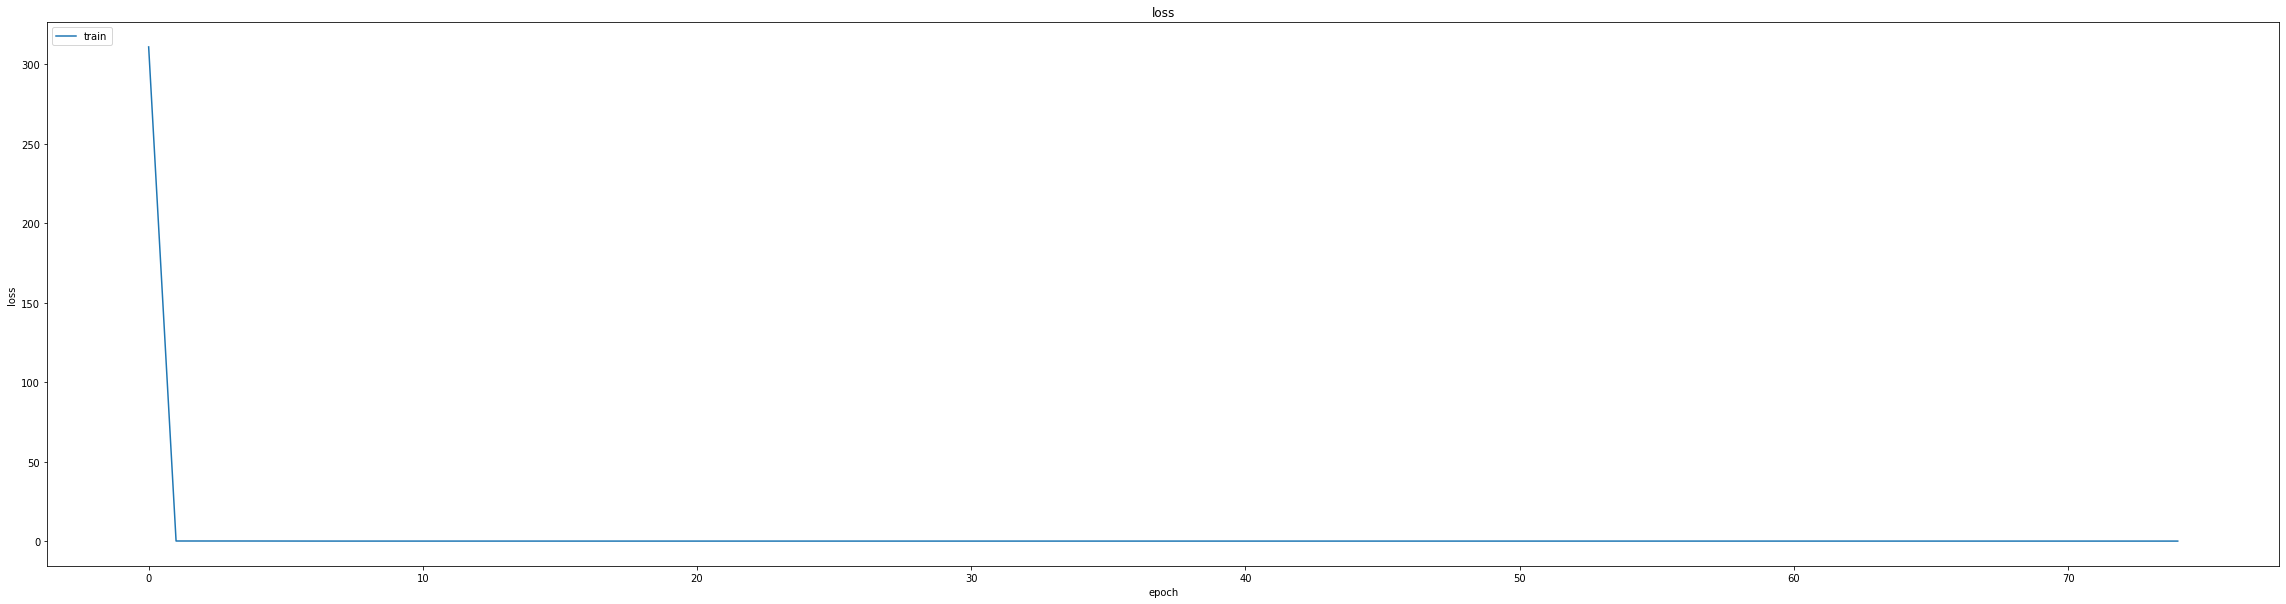

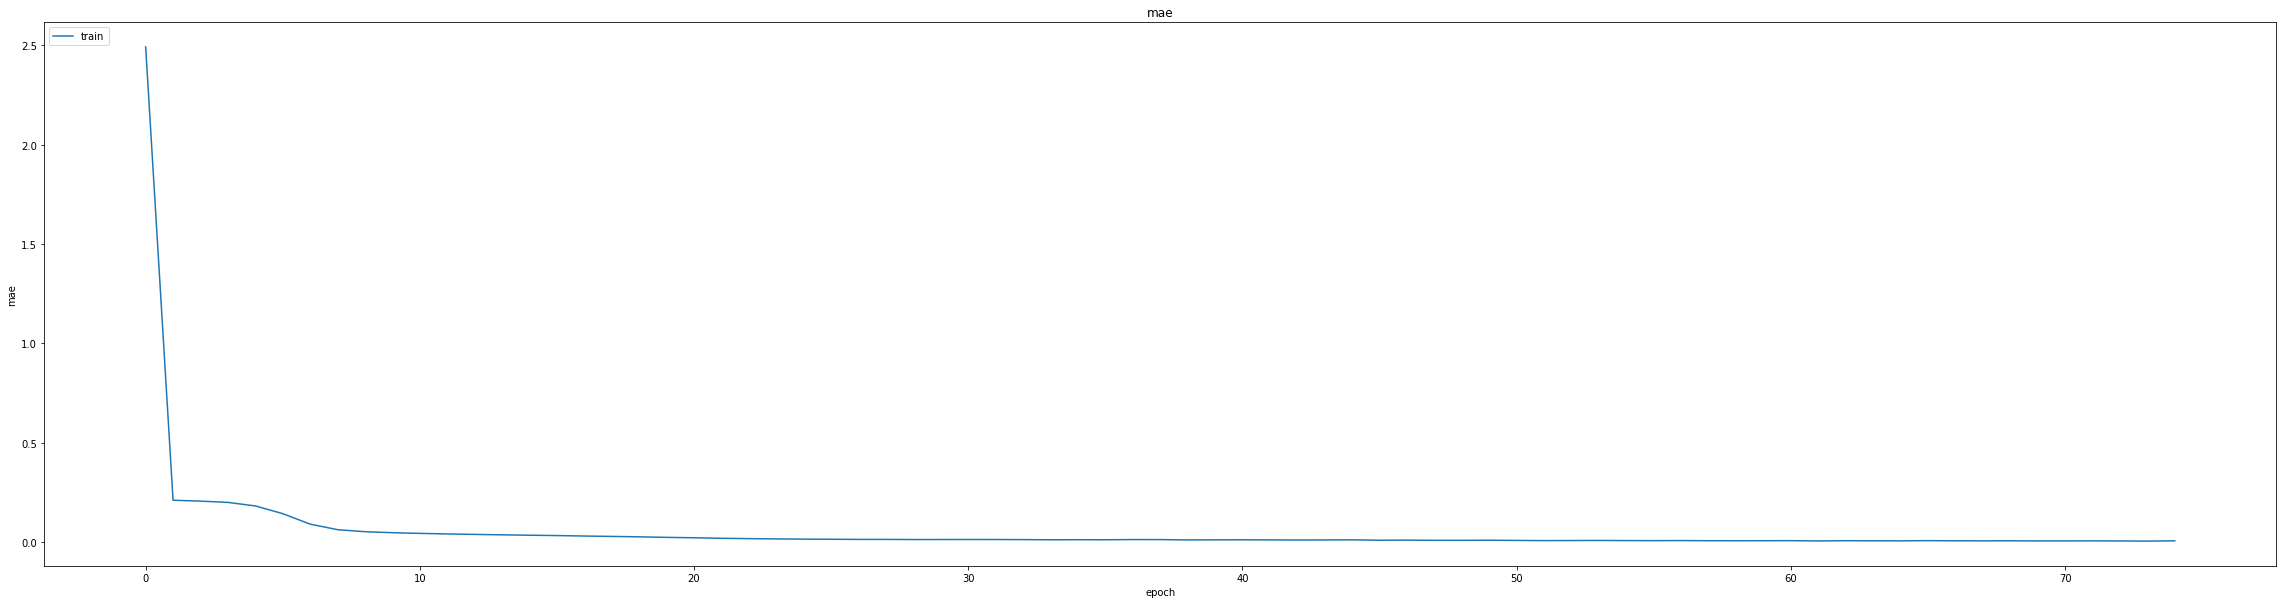

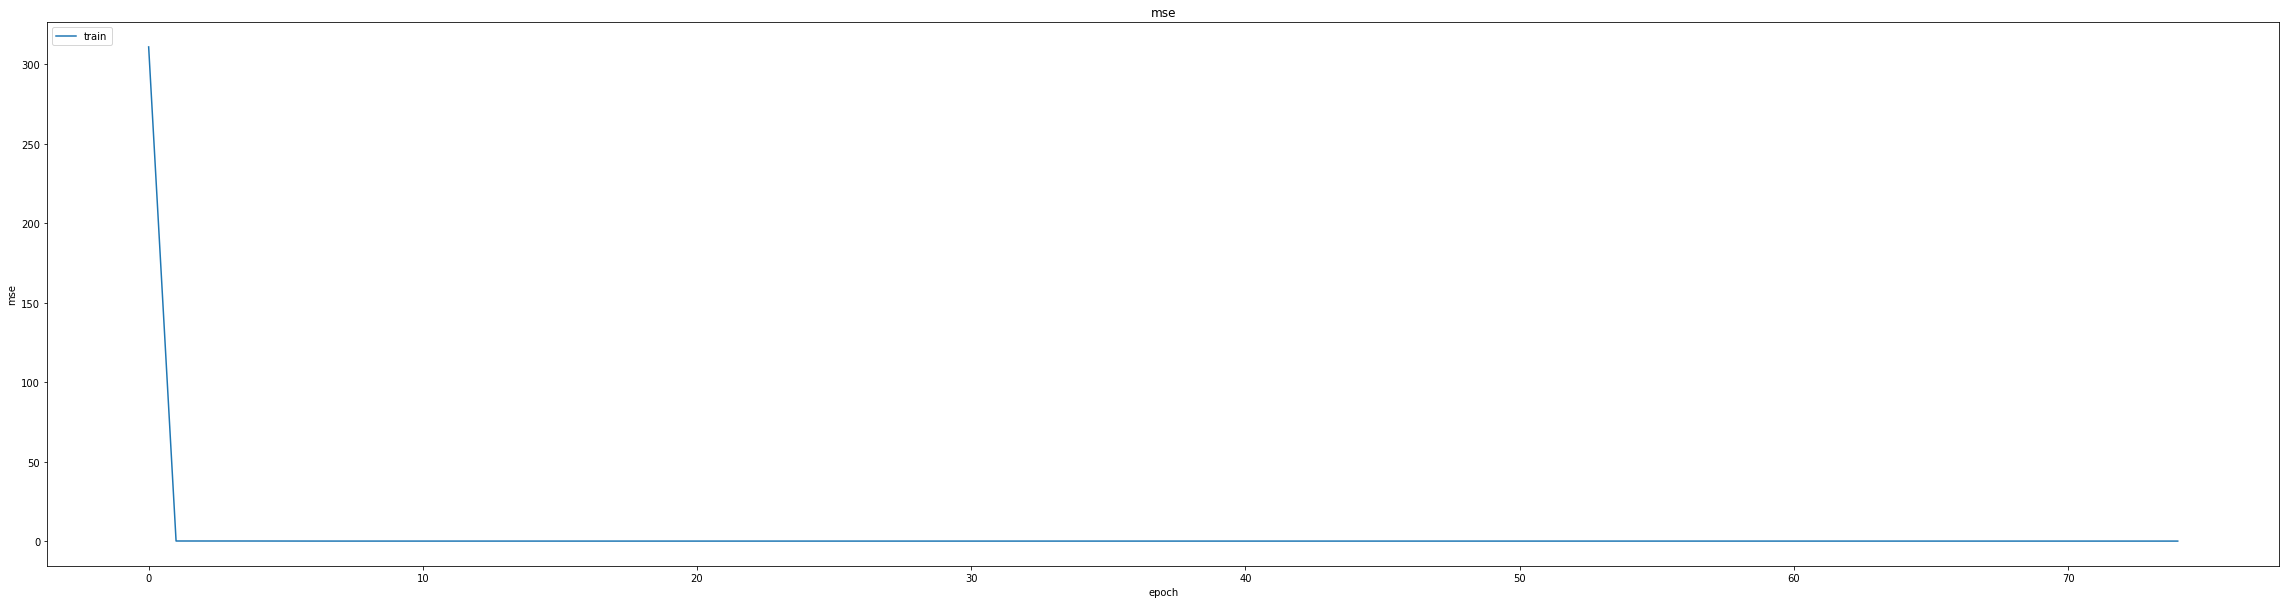

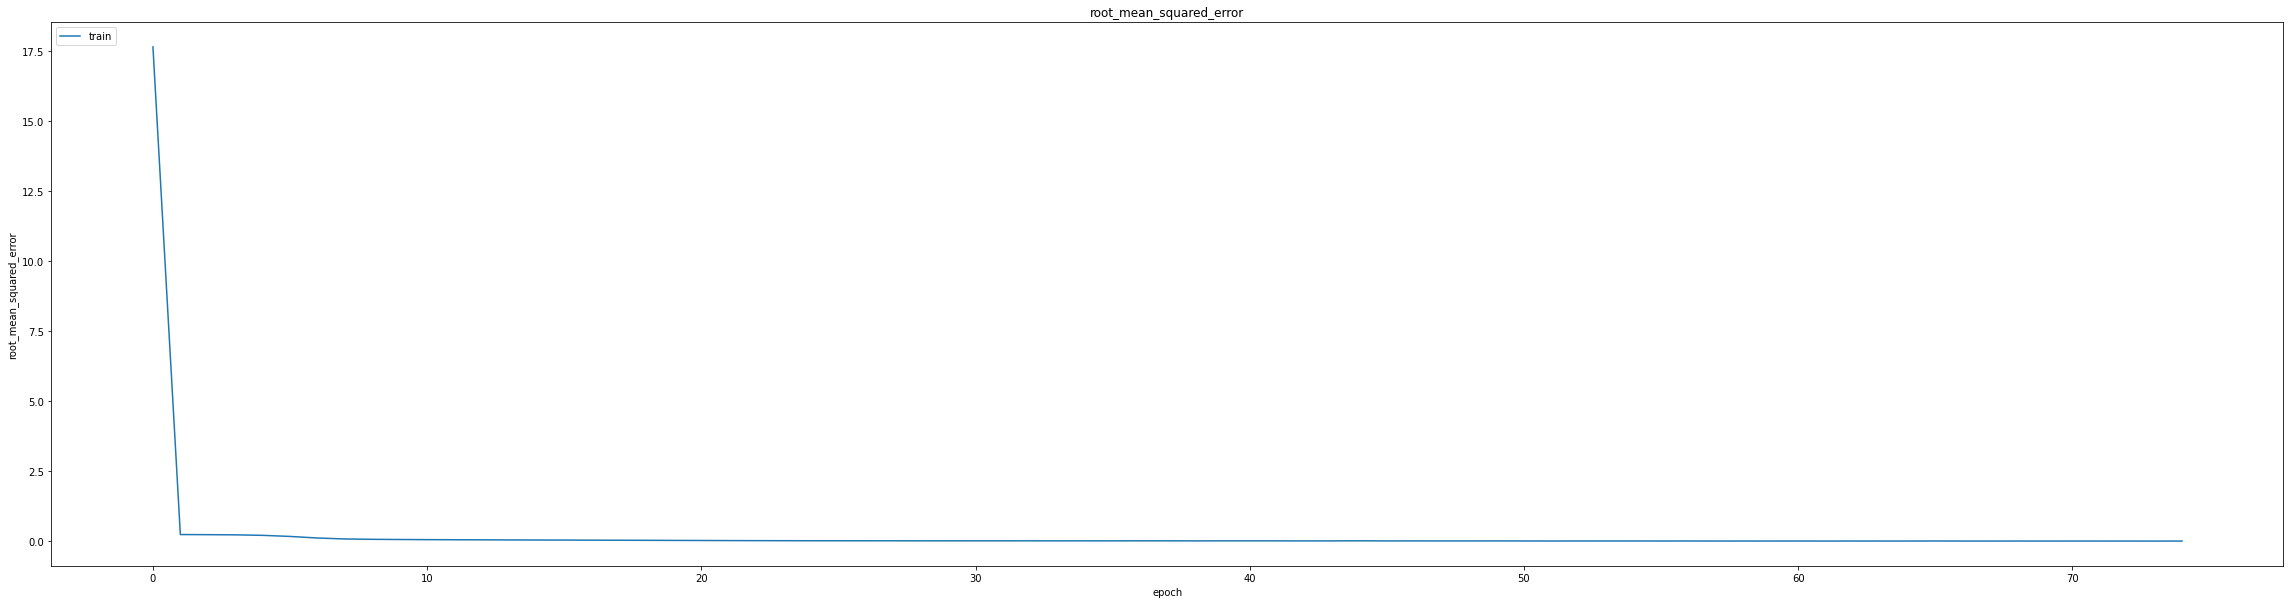

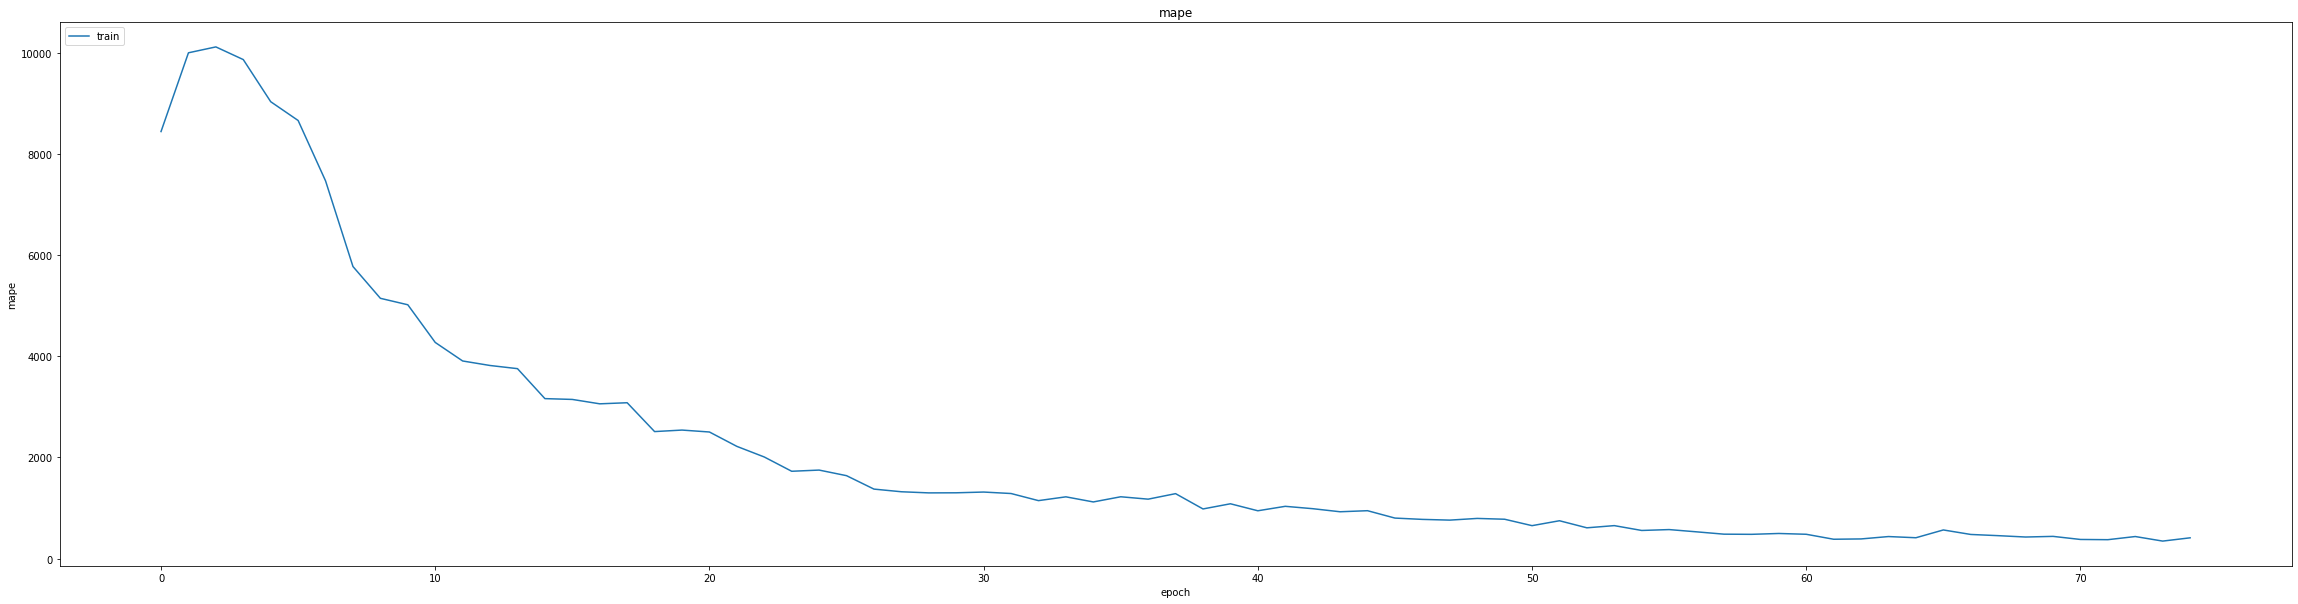

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.012427623383700848
0.01688605360686779
234/234 [==============================] - 12s 39ms/step
0.9896035573044444


In [ ]:
model.load_weights("weights.best.hdf5")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)
from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25
464/464 [==============================] - ETA: 0s - loss: 9.6301e-04 - mae: 0.0128 - mse: 9.6301e-04 - root_mean_squared_error: 0.0310 - mape: 1200.4297
Epoch 1: val_mse did not improve from 0.00029
464/464 [==============================] - 154s 311ms/step - loss: 9.6301e-04 - mae: 0.0128 - mse: 9.6301e-04 - root_mean_squared_error: 0.0310 - mape: 1200.4297 - val_loss: 4.4604e-04 - val_mae: 0.0174 - val_mse: 4.4604e-04 - val_root_mean_squared_error: 0.0211 - val_mape: 6344.1655 - lr: 0.0010
Epoch 2/25
464/464 [==============================] - ETA: 0s - loss: 6.2702e-05 - mae: 0.0061 - mse: 6.2702e-05 - root_mean_squared_error: 0.0079 - mape: 723.7930
Epoch 2: val_mse did not improve from 0.00029
464/464 [==============================] - 139s 300ms/step - loss: 6.2702e-05 - mae: 0.0061 - mse: 6.2702e-05 - root_mean_squared_error: 0.0079 - mape: 723.7930 - val_loss: 4.9162e-04 - val_mae: 0.0187 - val_mse: 4.9162e-04 - val_root_mean_squared_error: 0.0222 - val_mape: 5385.37

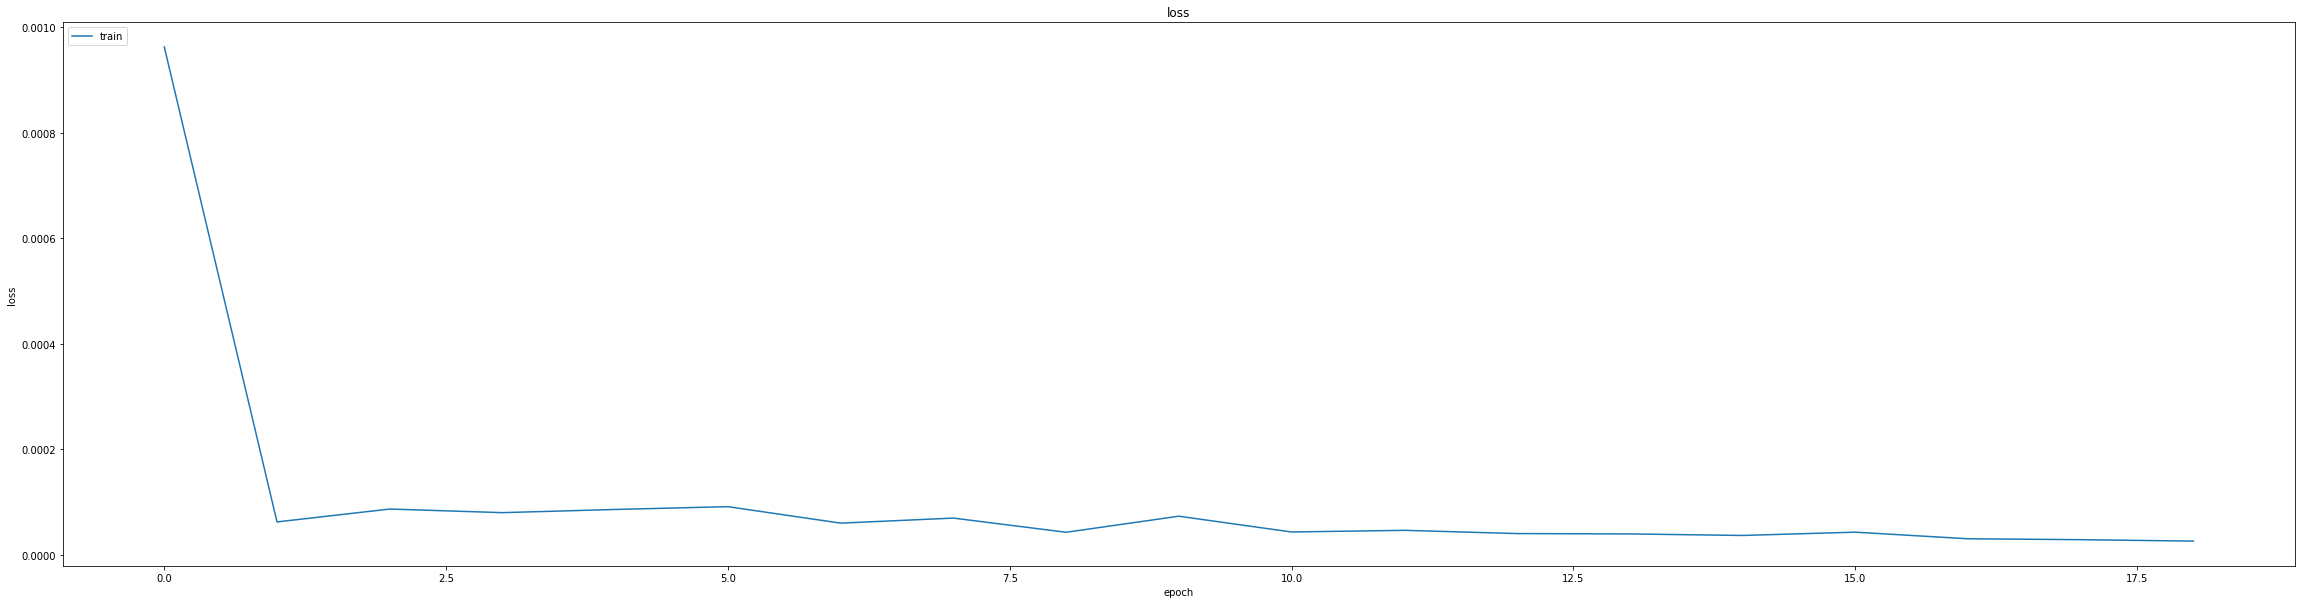

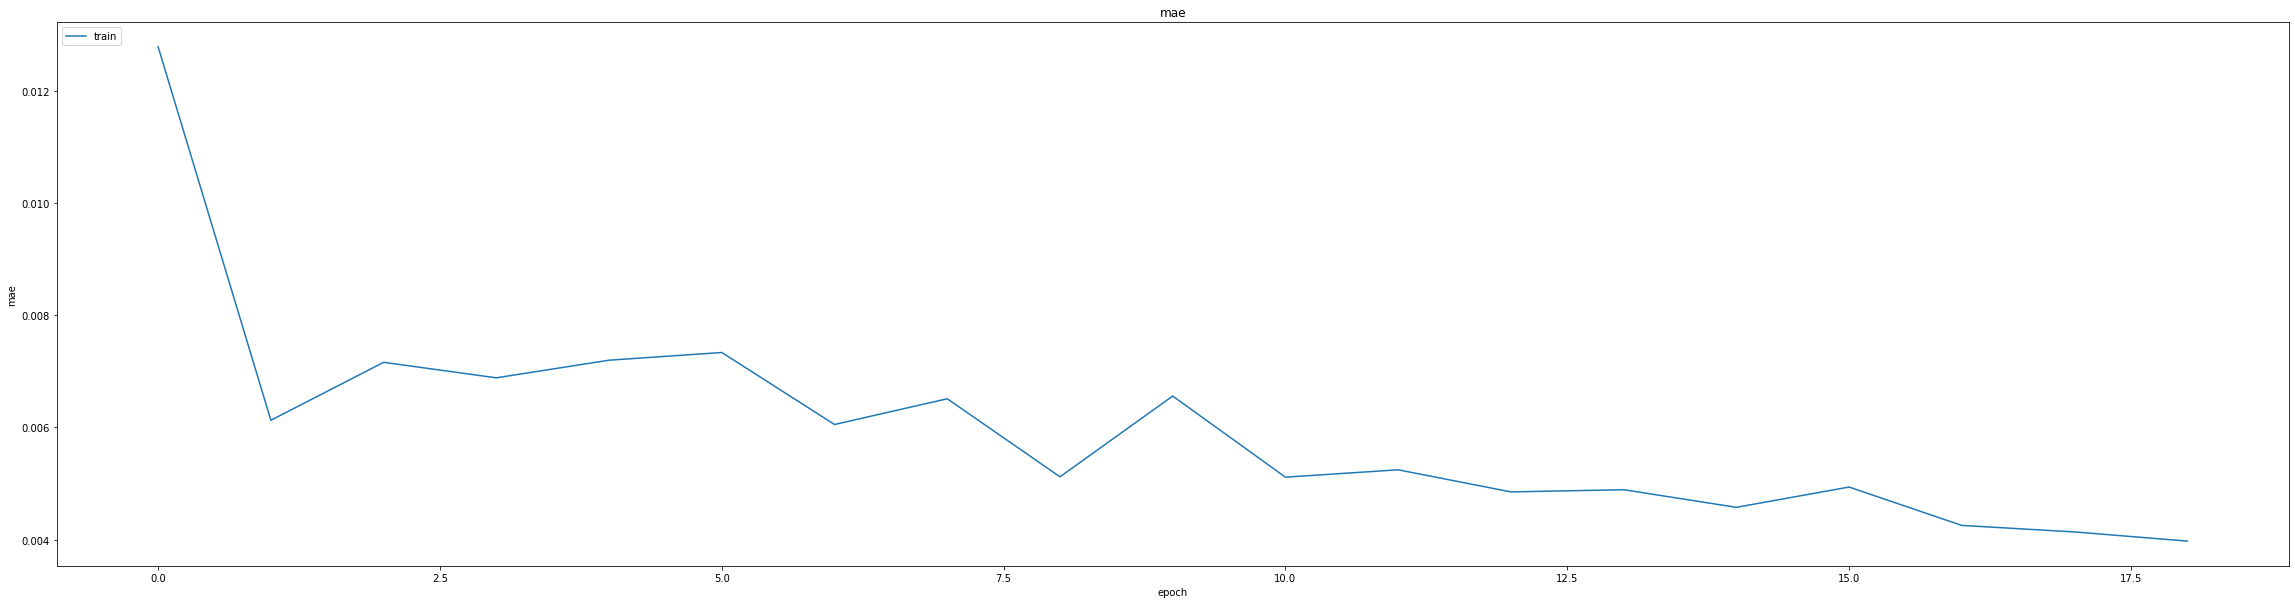

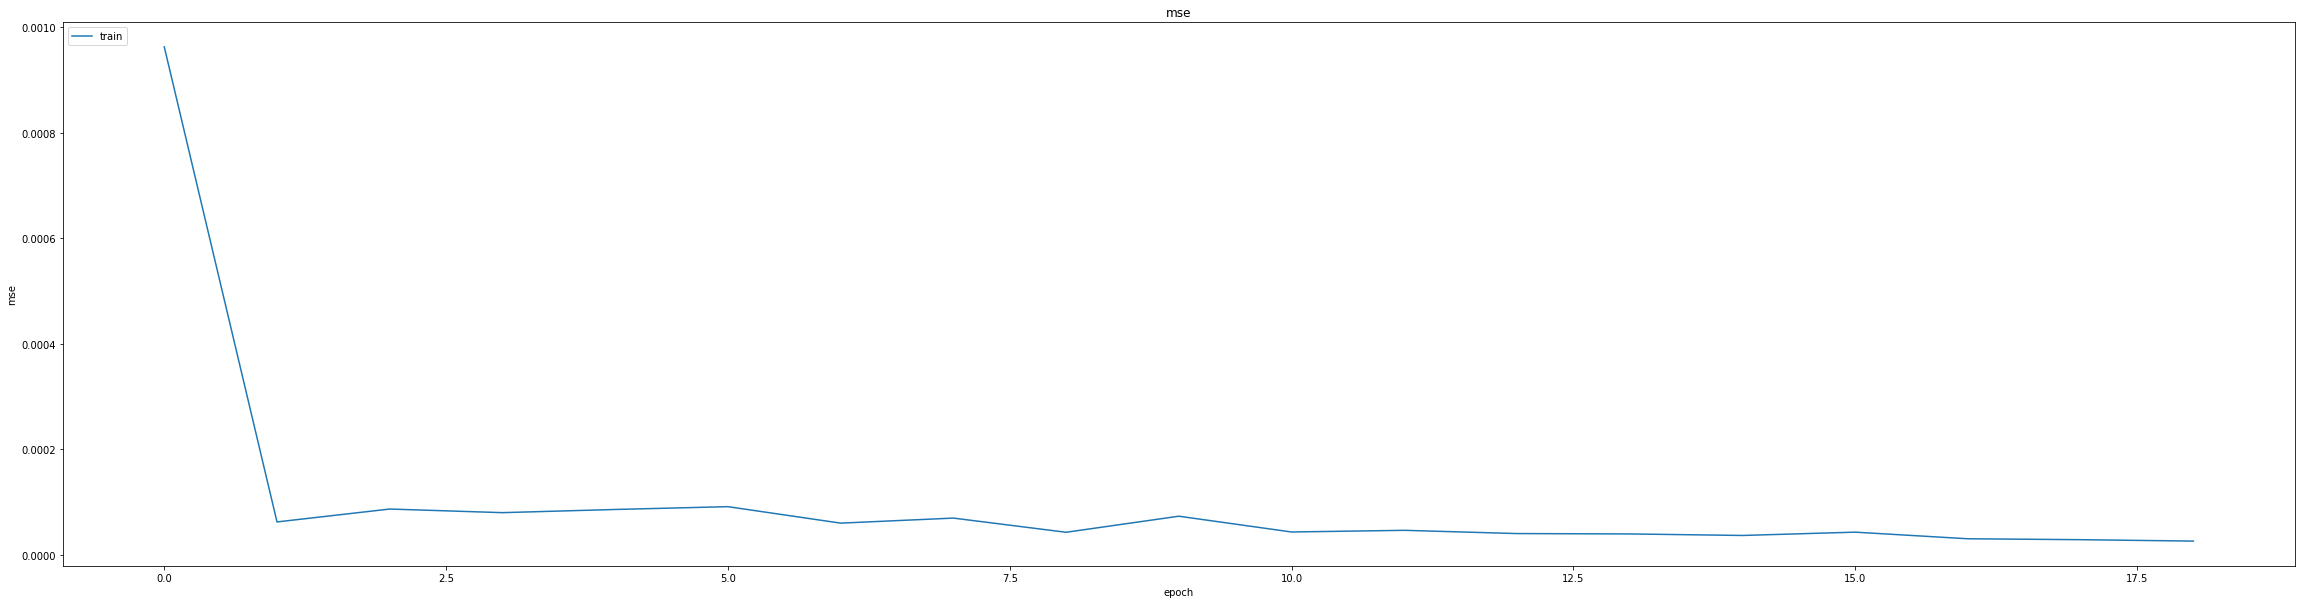

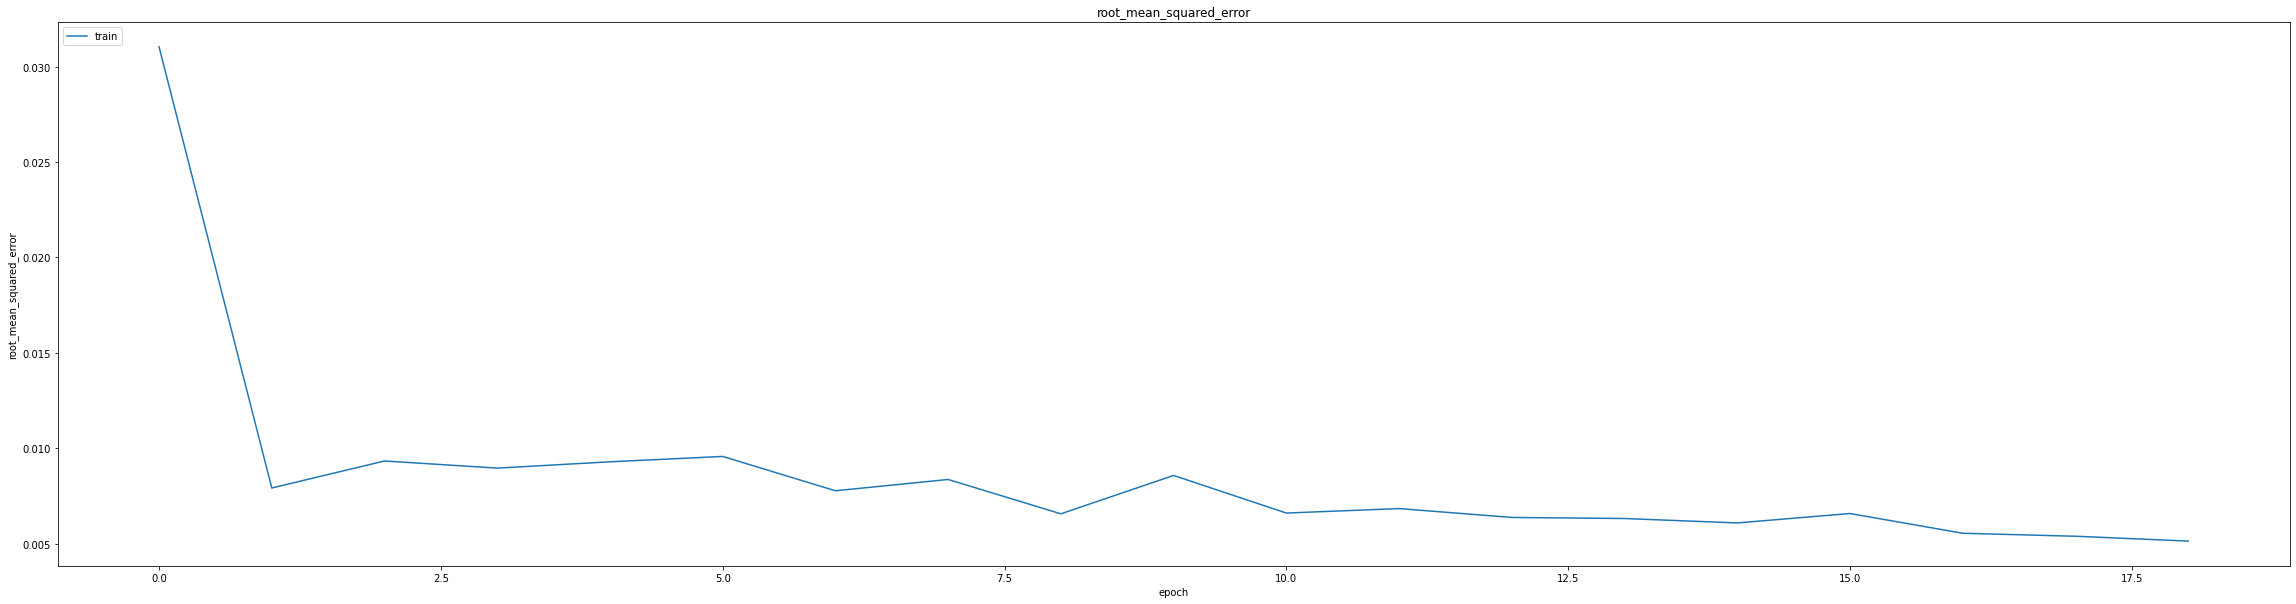

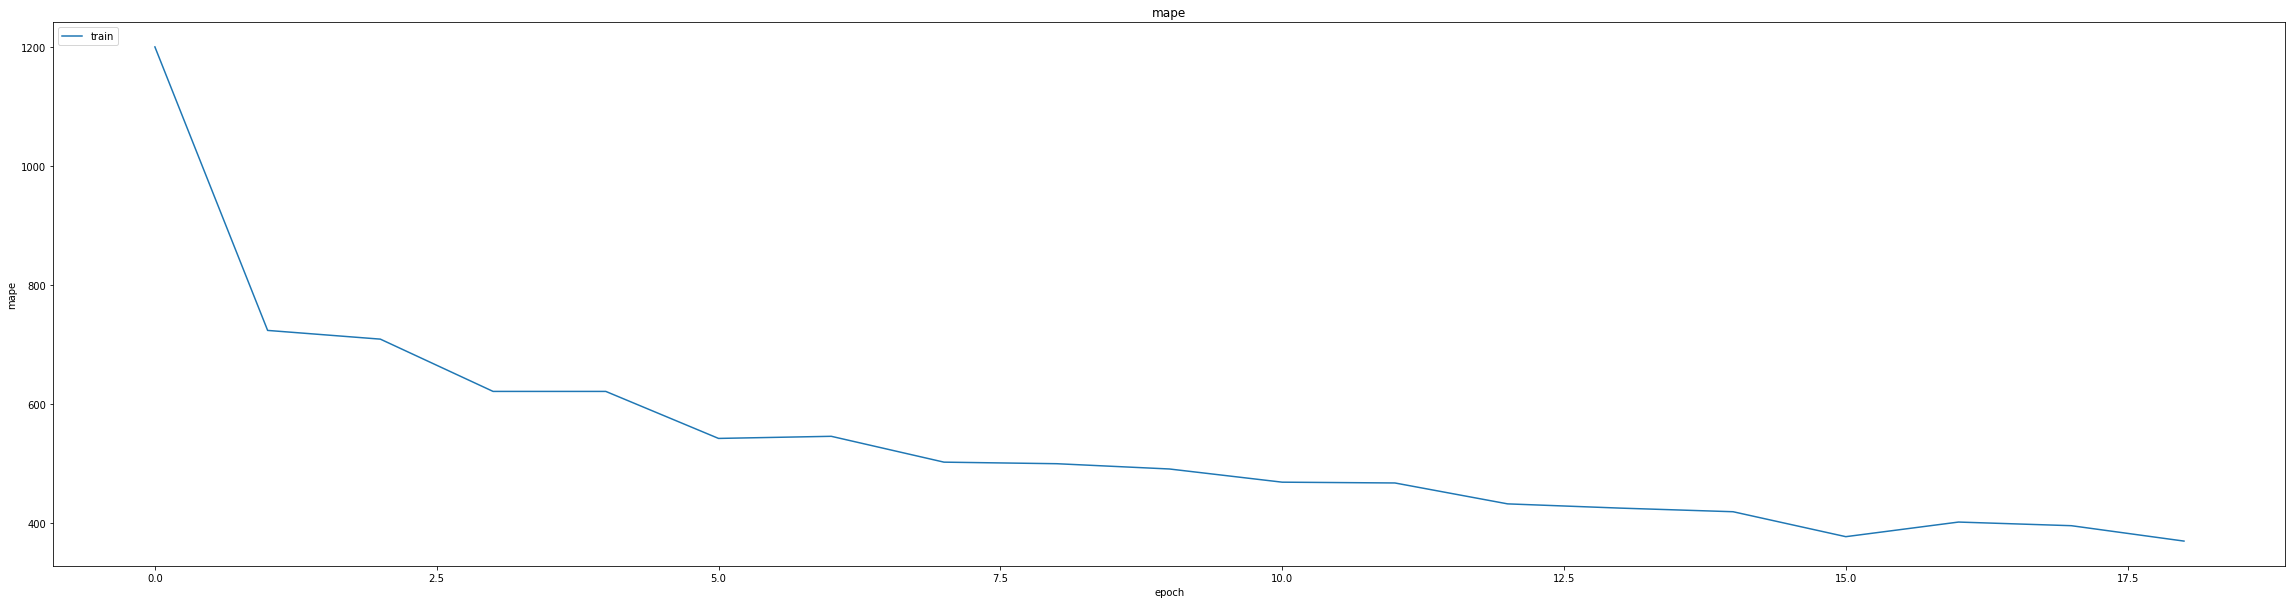

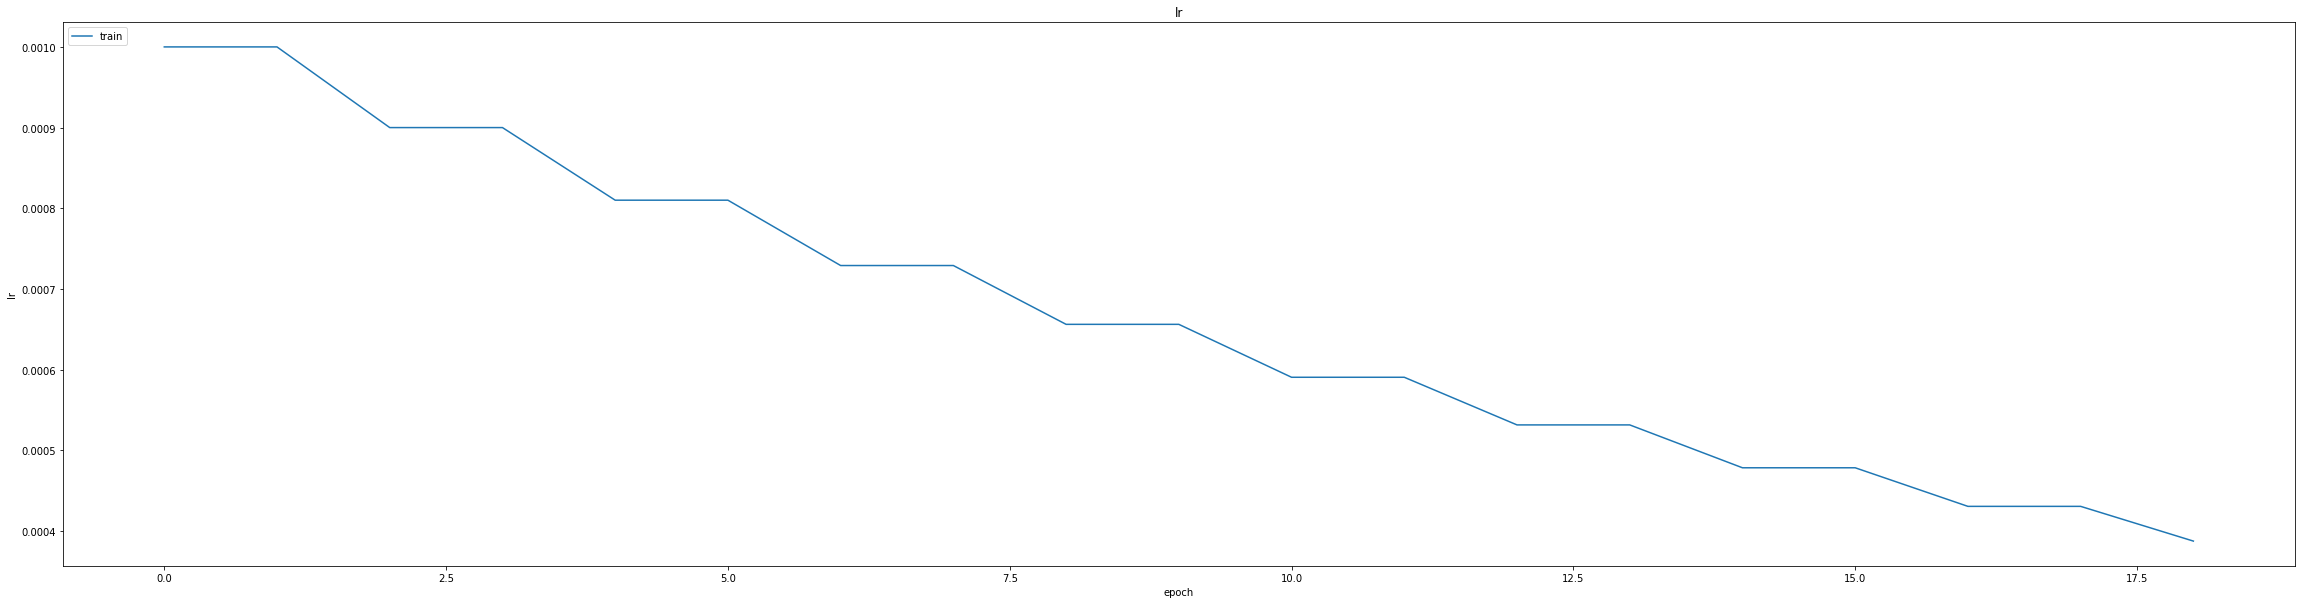

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.017112363129854202
0.020286643877625465
234/234 [==============================] - 11s 40ms/step
0.9882828789376633


234/234 [==============================] - 9s 40ms/step


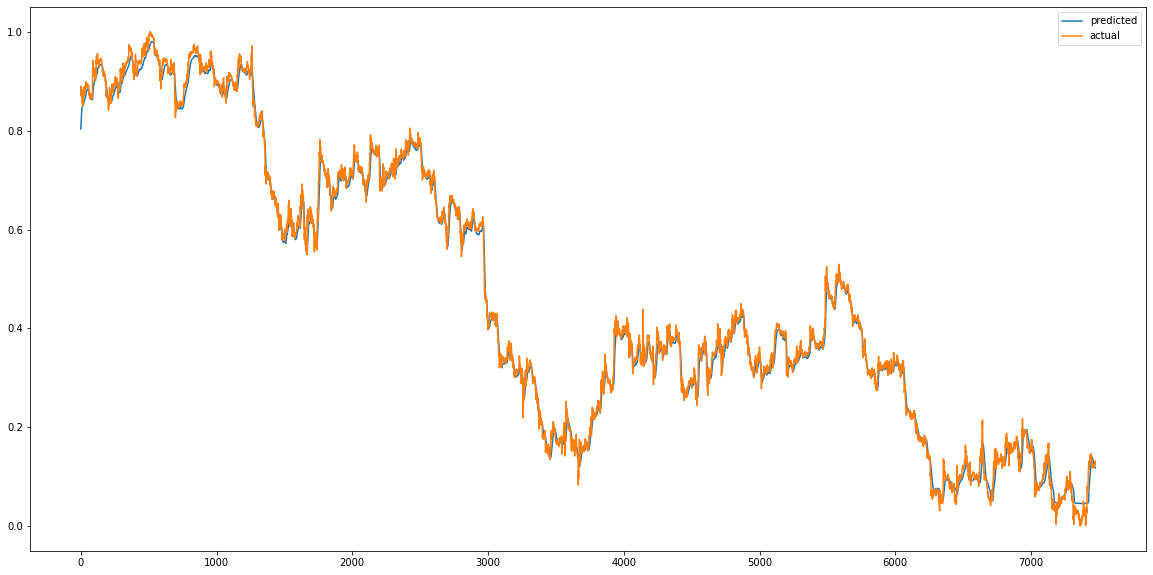

In [ ]:
model.load_weights("weights.best.hdf5")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


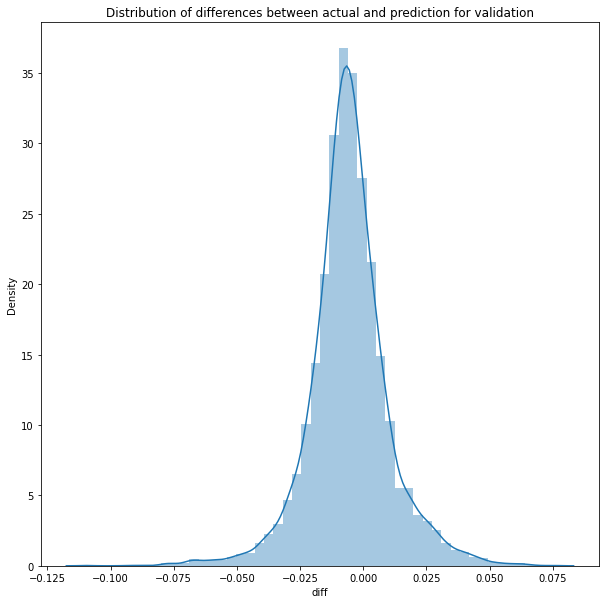

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

230/230 [==============================] - 13s 57ms/step


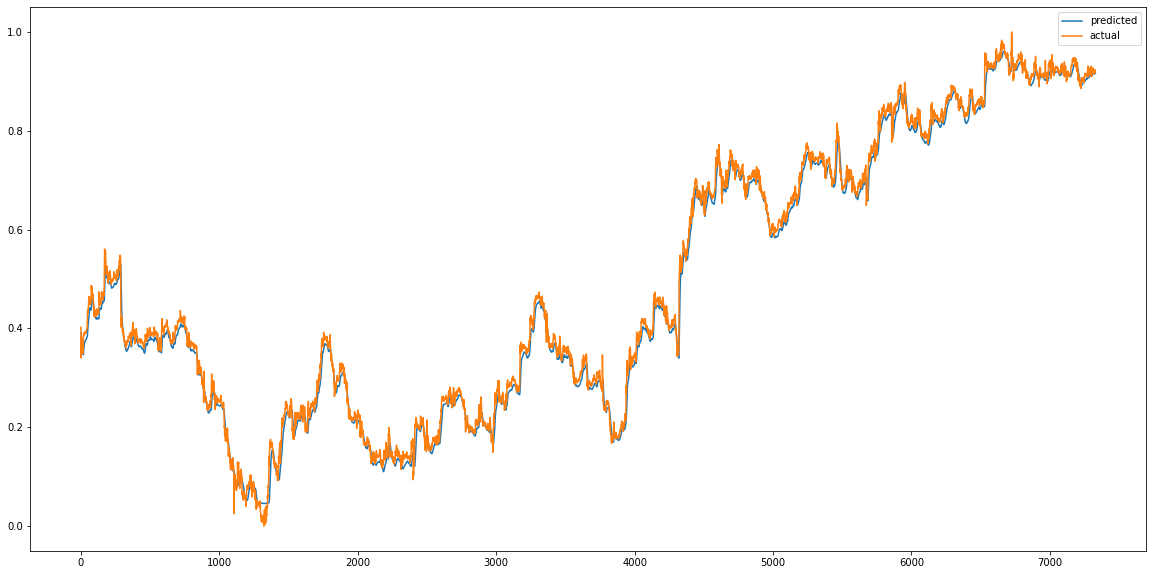

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


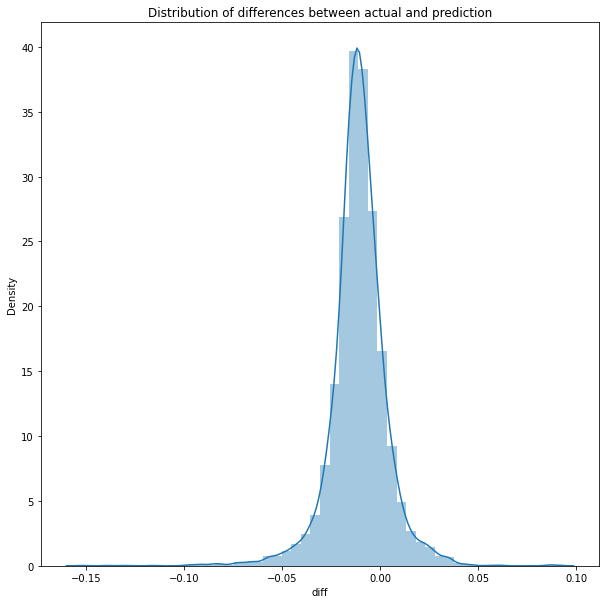

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))
print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))
from math import sqrt

print('RMSE  :', sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

test_r2_scr = thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :',test_r2_scr)


predictions['diff'].describe()

MSE :  0.00033219207052932276
MAE :  0.014069863595449676
RMSE  : 0.018226137016091007
230/230 [==============================] - 10s 42ms/step
R2_Score  : 0.9955836447247915


count    7329.000000
mean       -0.011025
std         0.014514
min        -0.152808
25%        -0.017375
50%        -0.010965
75%        -0.003889
max         0.091382
Name: diff, dtype: float64

In [ ]:
model= thesis.GRU_LSTM_Model(x_train)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 24, 32)            4416      
                                                                 
 lstm (LSTM)                 (None, 24, 256)           295936    
                                                                 
 dropout (Dropout)           (None, 24, 256)           0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                82176     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 1

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)


In [ ]:
from keras.callbacks import ModelCheckpoint





checkpoint = ModelCheckpoint("weights.best.hdf5", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

In [ ]:
Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
464/464 [==============================] - ETA: 0s - loss: 495.0534 - mae: 3.7945 - mse: 495.0534 - root_mean_squared_error: 22.2498 - mape: 12389.8438
Epoch 1: val_mse improved from inf to 0.10125, saving model to weights.best.hdf5
464/464 [==============================] - 149s 307ms/step - loss: 495.0534 - mae: 3.7945 - mse: 495.0534 - root_mean_squared_error: 22.2498 - mape: 12389.8438 - val_loss: 0.1013 - val_mae: 0.2803 - val_mse: 0.1013 - val_root_mean_squared_error: 0.3182 - val_mape: 82223.6719
Epoch 2/75
464/464 [==============================] - ETA: 0s - loss: 0.0551 - mae: 0.2040 - mse: 0.0551 - root_mean_squared_error: 0.2346 - mape: 9734.2139
Epoch 2: val_mse improved from 0.10125 to 0.09148, saving model to weights.best.hdf5
464/464 [==============================] - 137s 295ms/step - loss: 0.0551 - mae: 0.2040 - mse: 0.0551 - root_mean_squared_error: 0.2346 - mape: 9734.2139 - val_loss: 0.0915 - val_mae: 0.2705 - val_mse: 0.0915 - val_root_mean_squared_error

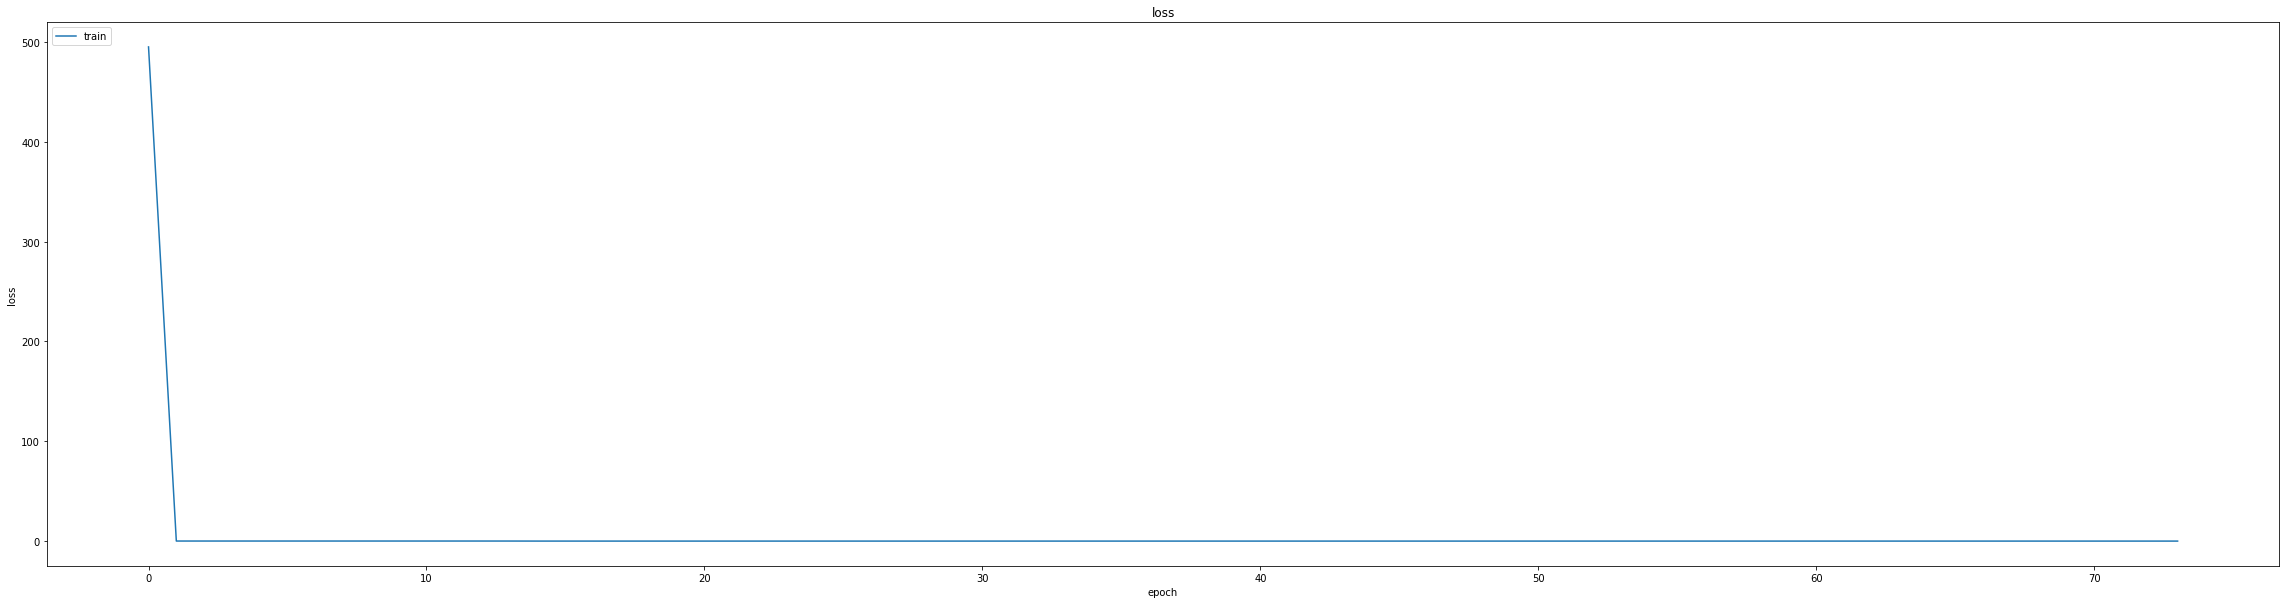

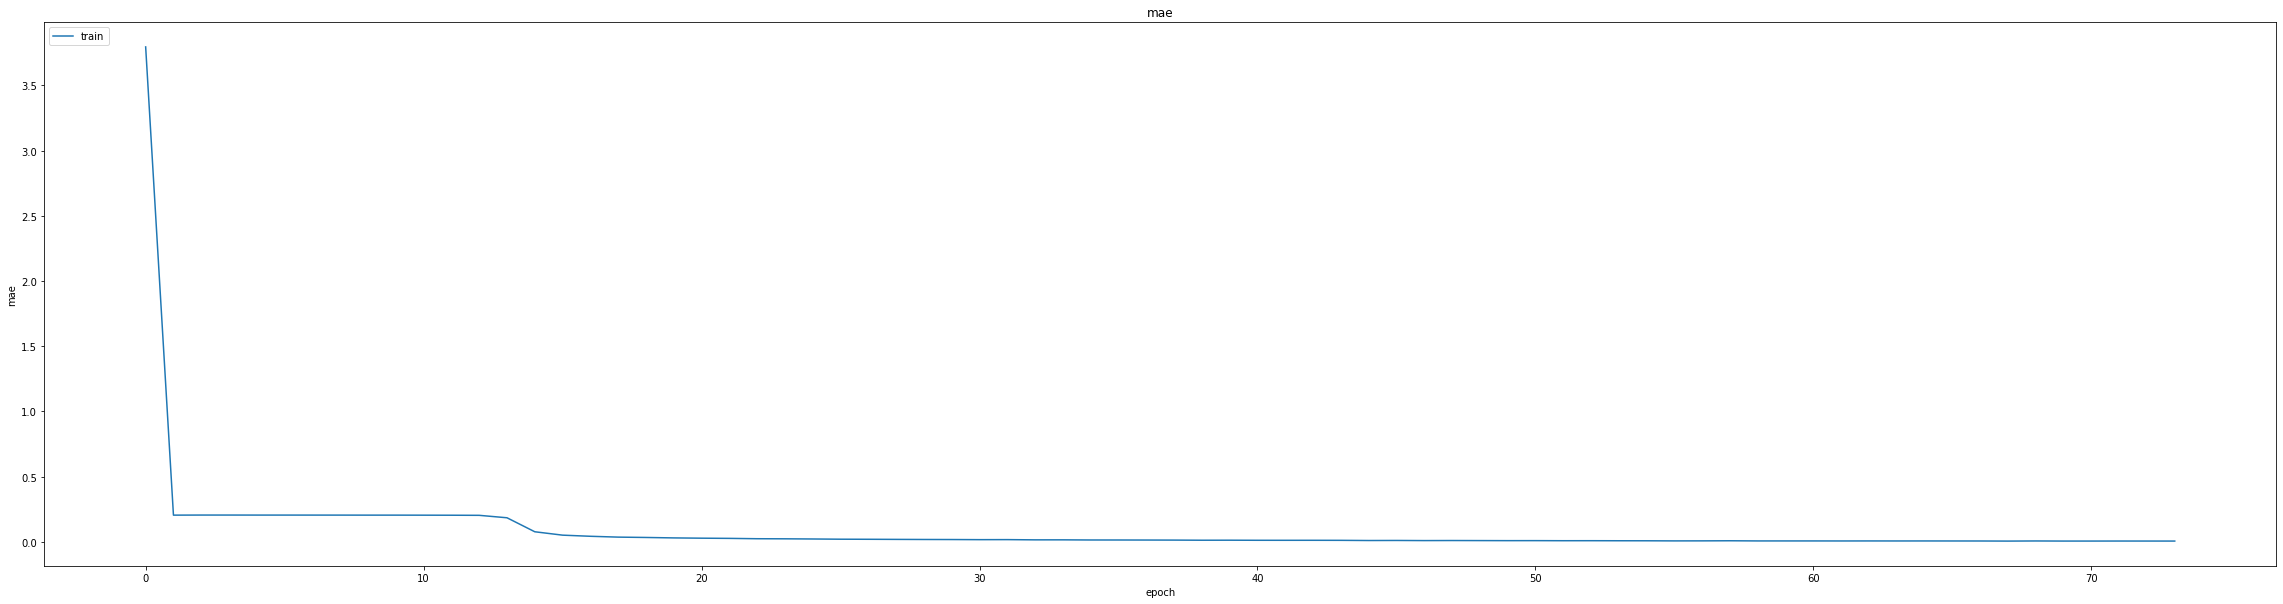

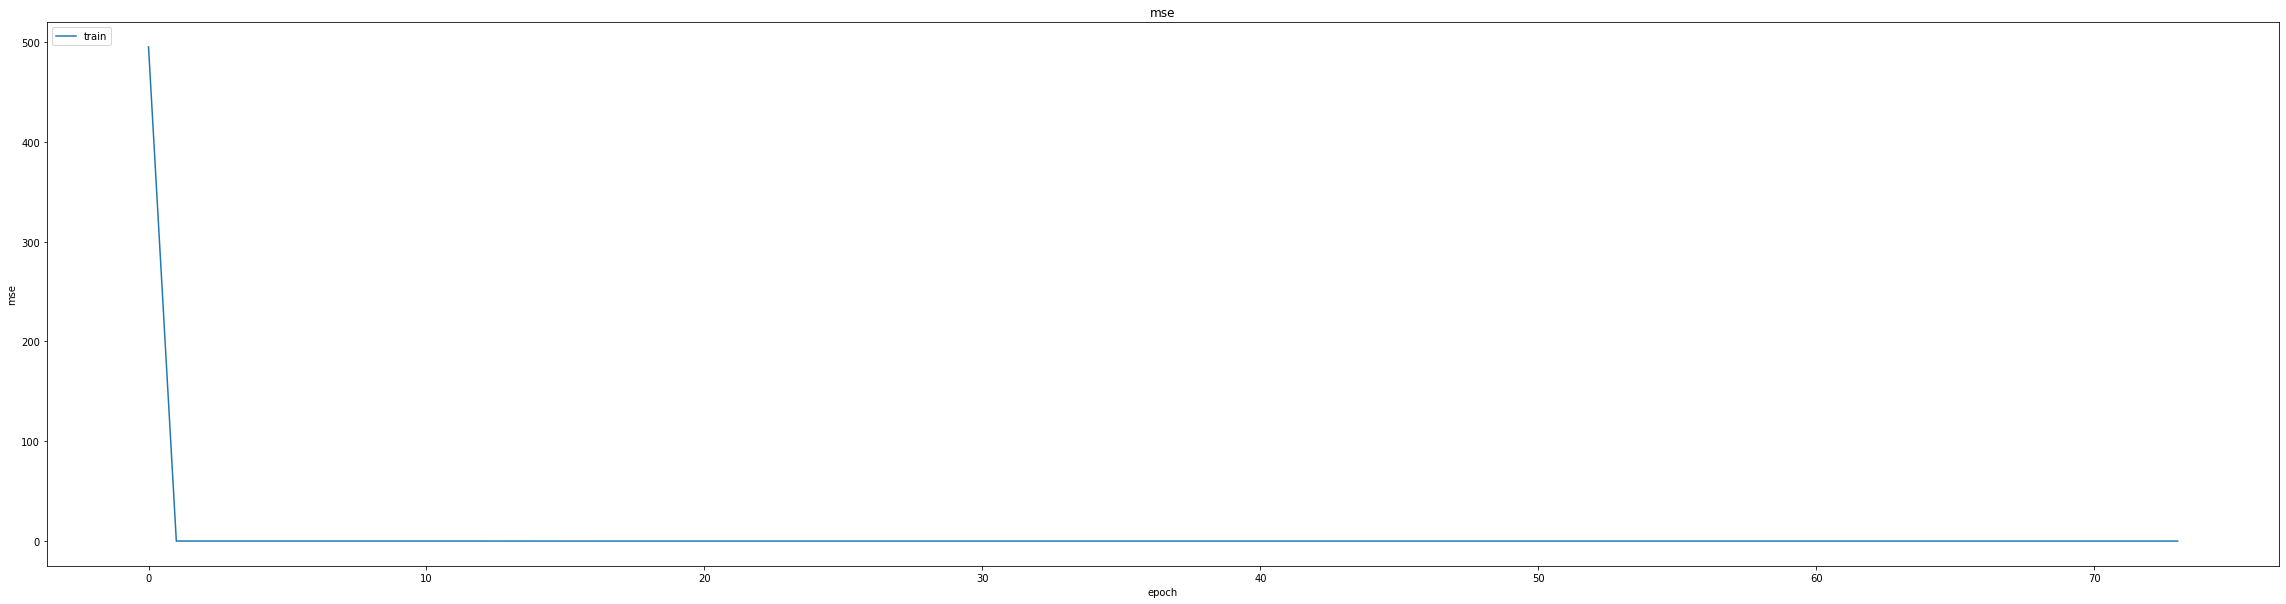

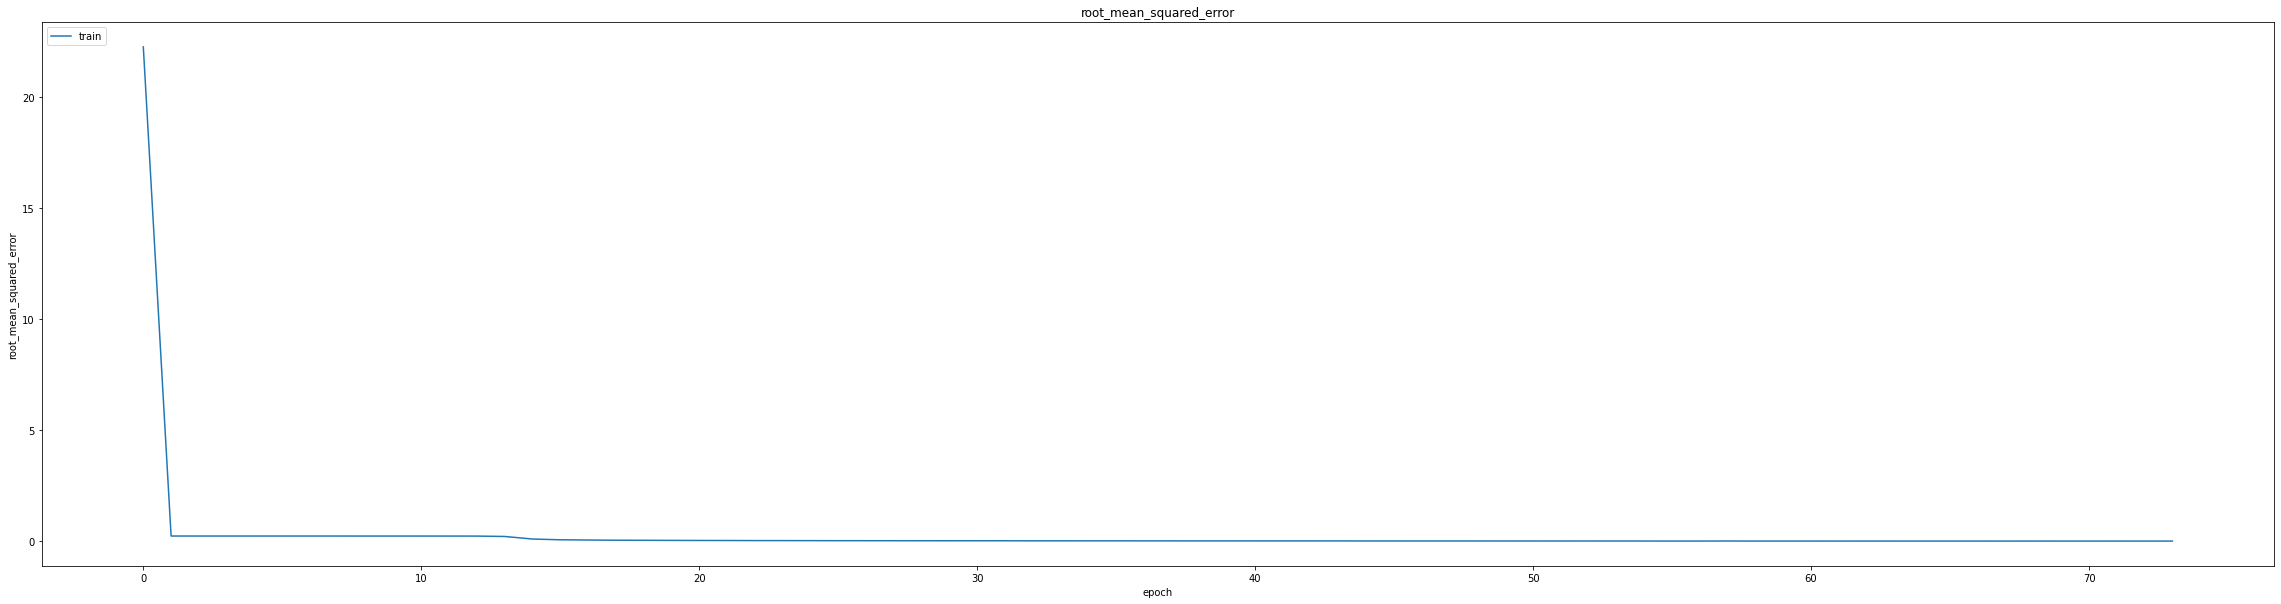

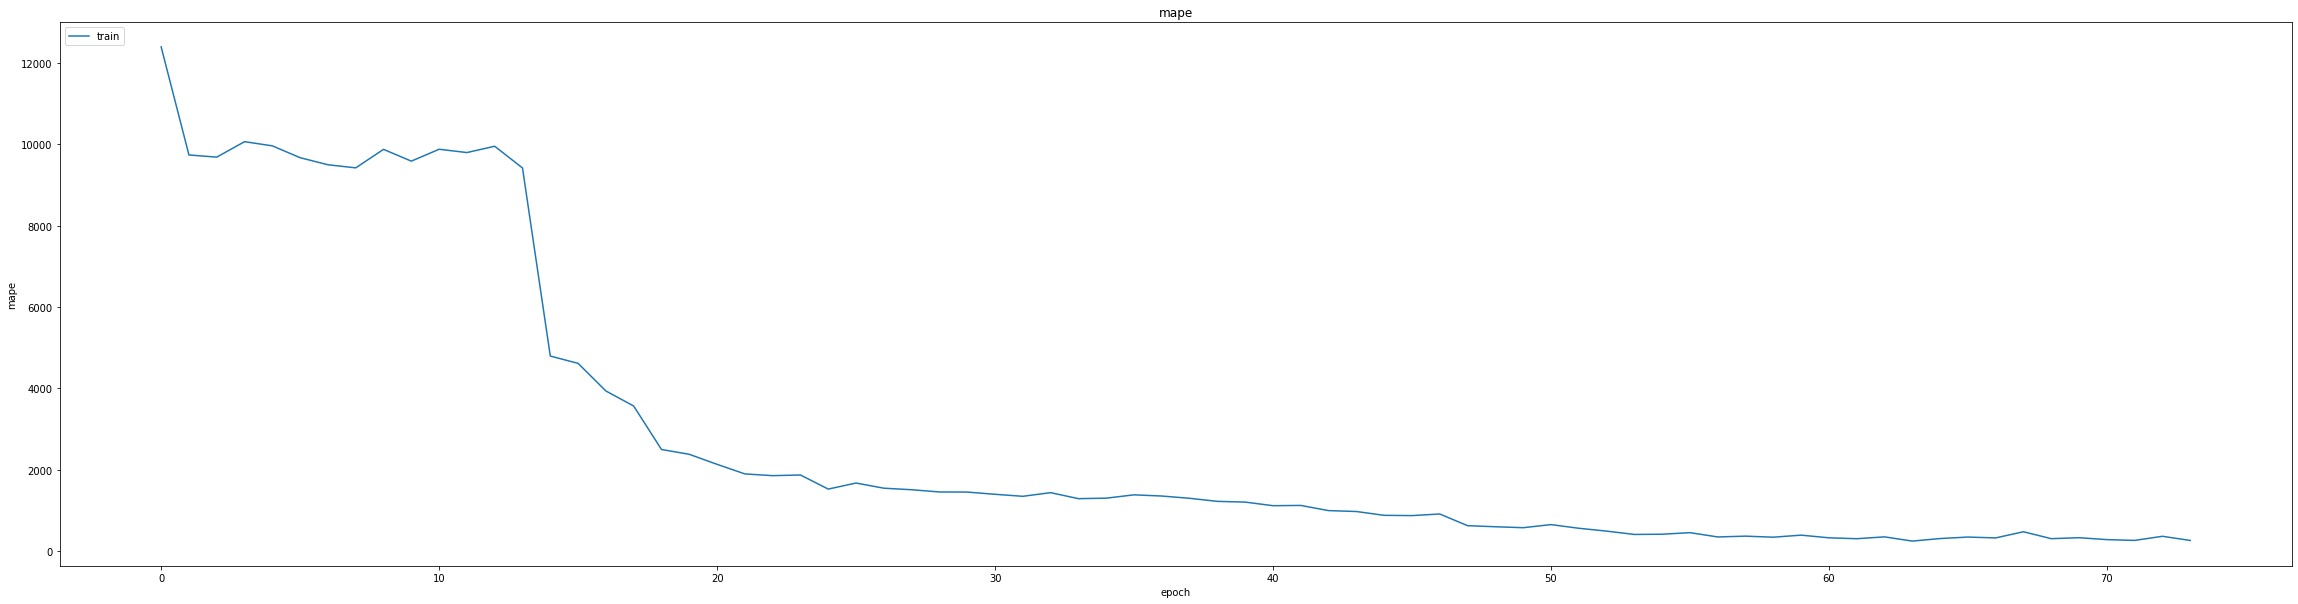

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['var_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.01493783388286829
0.02091960608959198
234/234 [==============================] - 11s 40ms/step
0.9767990072859247


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
model.load_weights("weights.best.hdf5")

In [ ]:
early_stopping = EarlyStopping(monitor='val_mse', patience=15)
from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]
Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25
464/464 [==============================] - ETA: 0s - loss: 8.3799e-04 - mae: 0.0131 - mse: 8.3799e-04 - root_mean_squared_error: 0.0289 - mape: 1930.1462
Epoch 1: val_mse did not improve from 0.00044
464/464 [==============================] - 151s 311ms/step - loss: 8.3799e-04 - mae: 0.0131 - mse: 8.3799e-04 - root_mean_squared_error: 0.0289 - mape: 1930.1462 - val_loss: 5.5284e-04 - val_mae: 0.0177 - val_mse: 5.5284e-04 - val_root_mean_squared_error: 0.0235 - val_mape: 7481.7905 - lr: 0.0010
Epoch 2/25
464/464 [==============================] - ETA: 0s - loss: 1.0007e-04 - mae: 0.0077 - mse: 1.0007e-04 - root_mean_squared_error: 0.0100 - mape: 1043.8868
Epoch 2: val_mse did not improve from 0.00044
464/464 [==============================] - 143s 308ms/step - loss: 1.0007e-04 - mae: 0.0077 - mse: 1.0007e-04 - root_mean_squared_error: 0.0100 - mape: 1043.8868 - val_loss: 6.3465e-04 - val_mae: 0.0202 - val_mse: 6.3465e-04 - val_root_mean_squared_error: 0.0252 - val_mape: 6186.

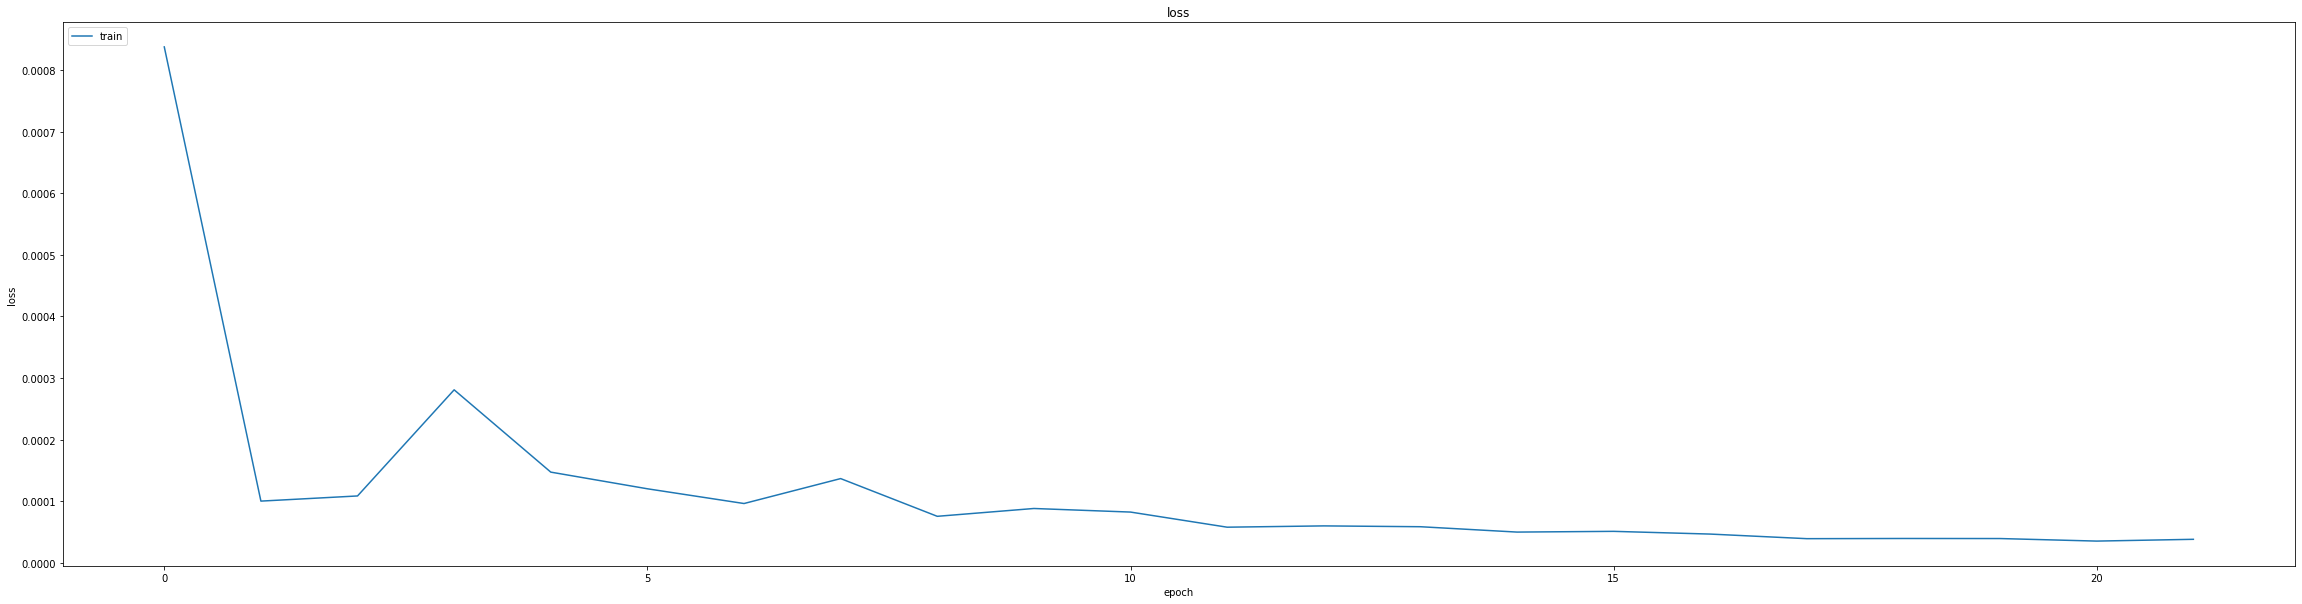

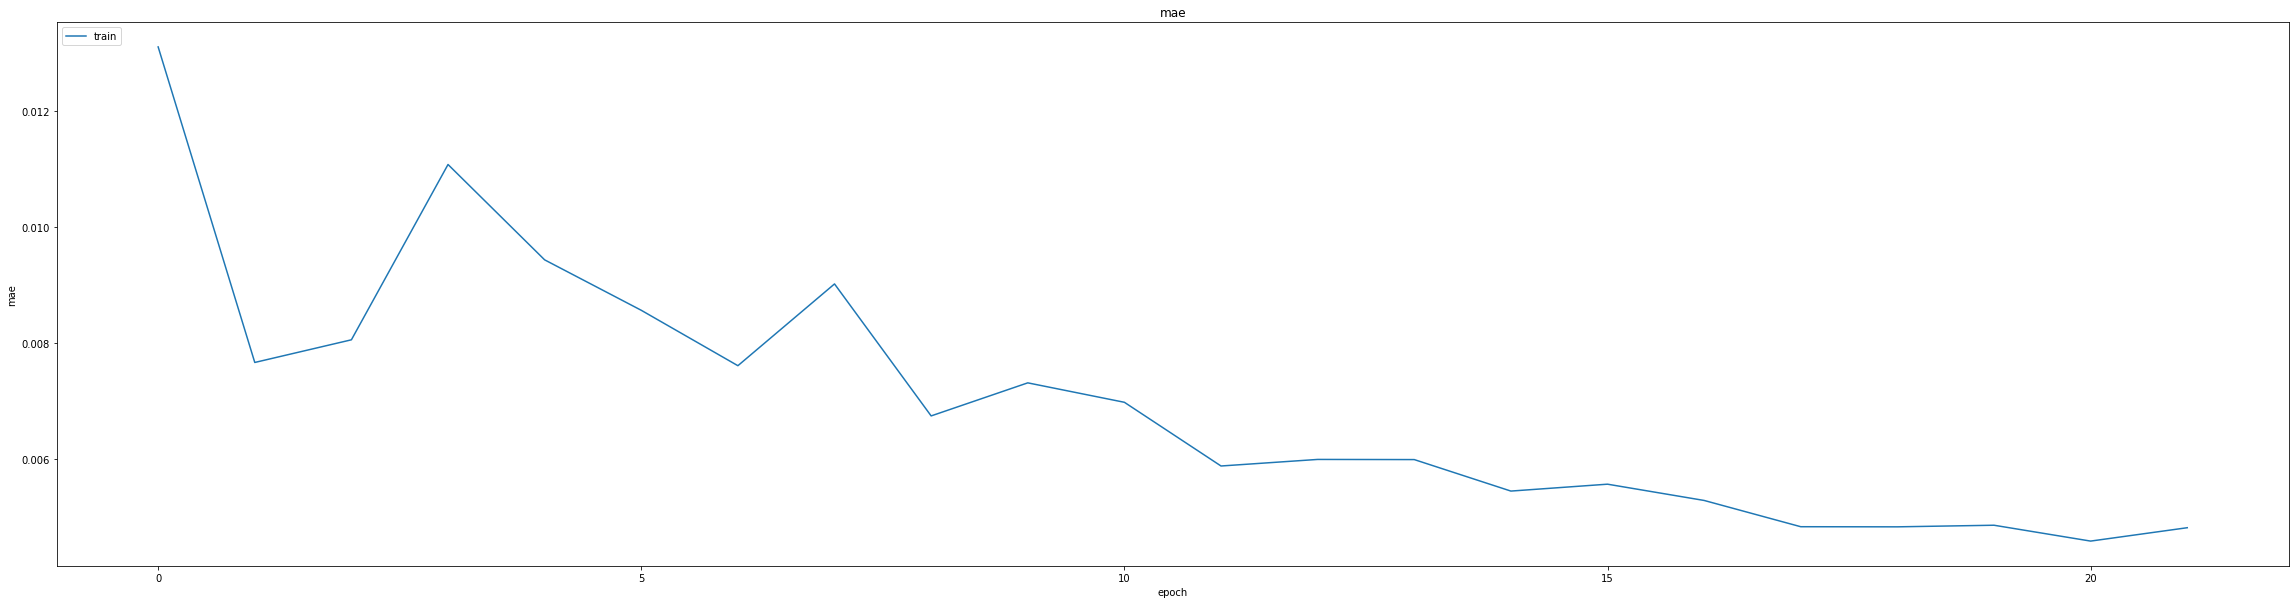

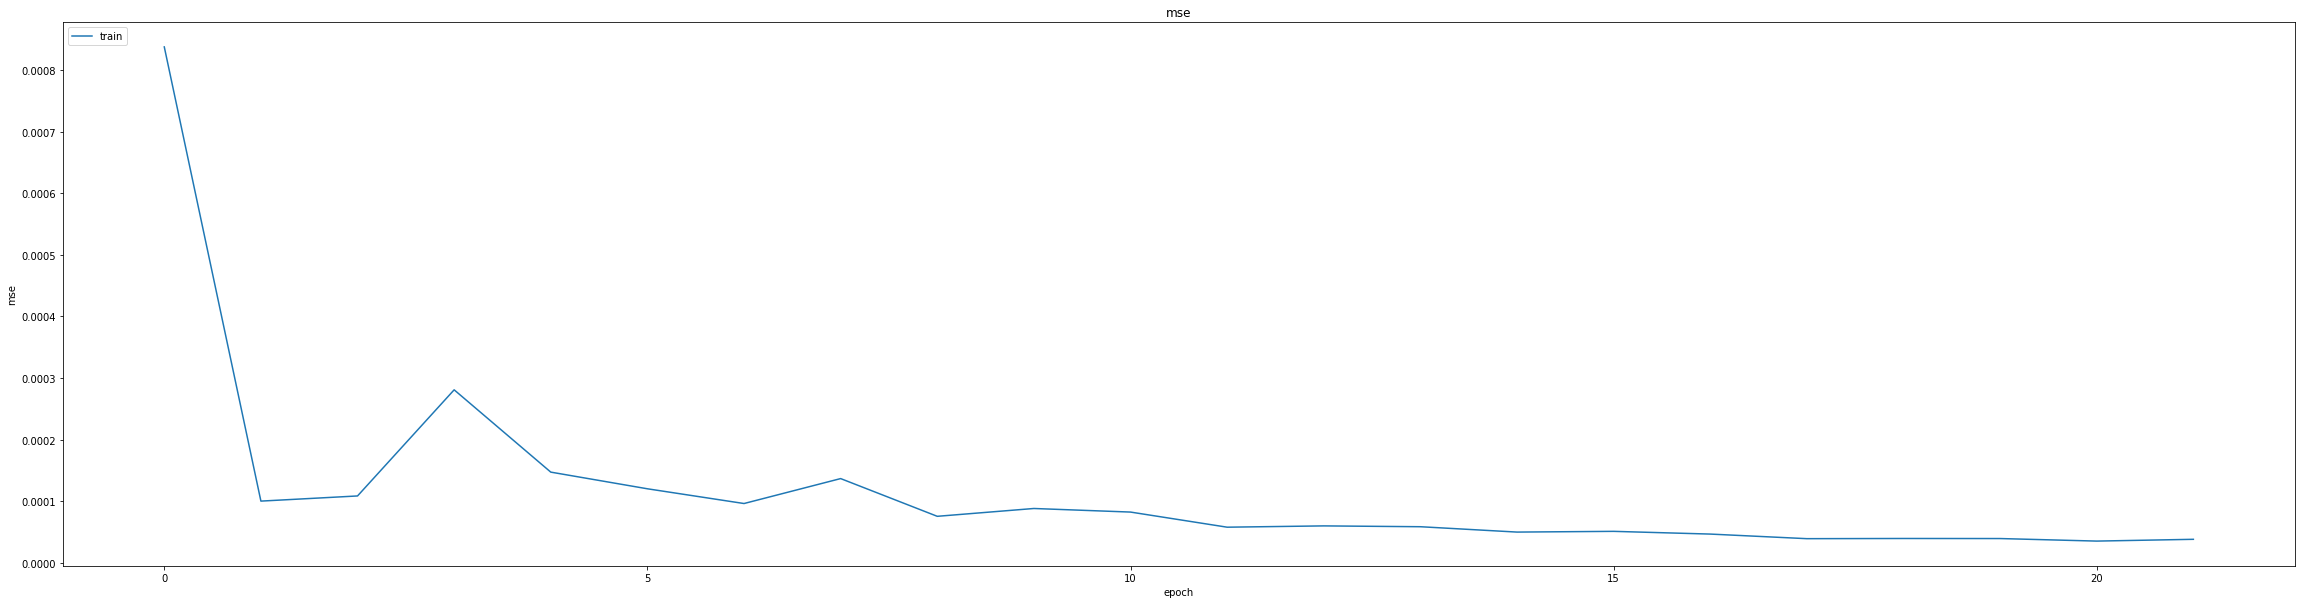

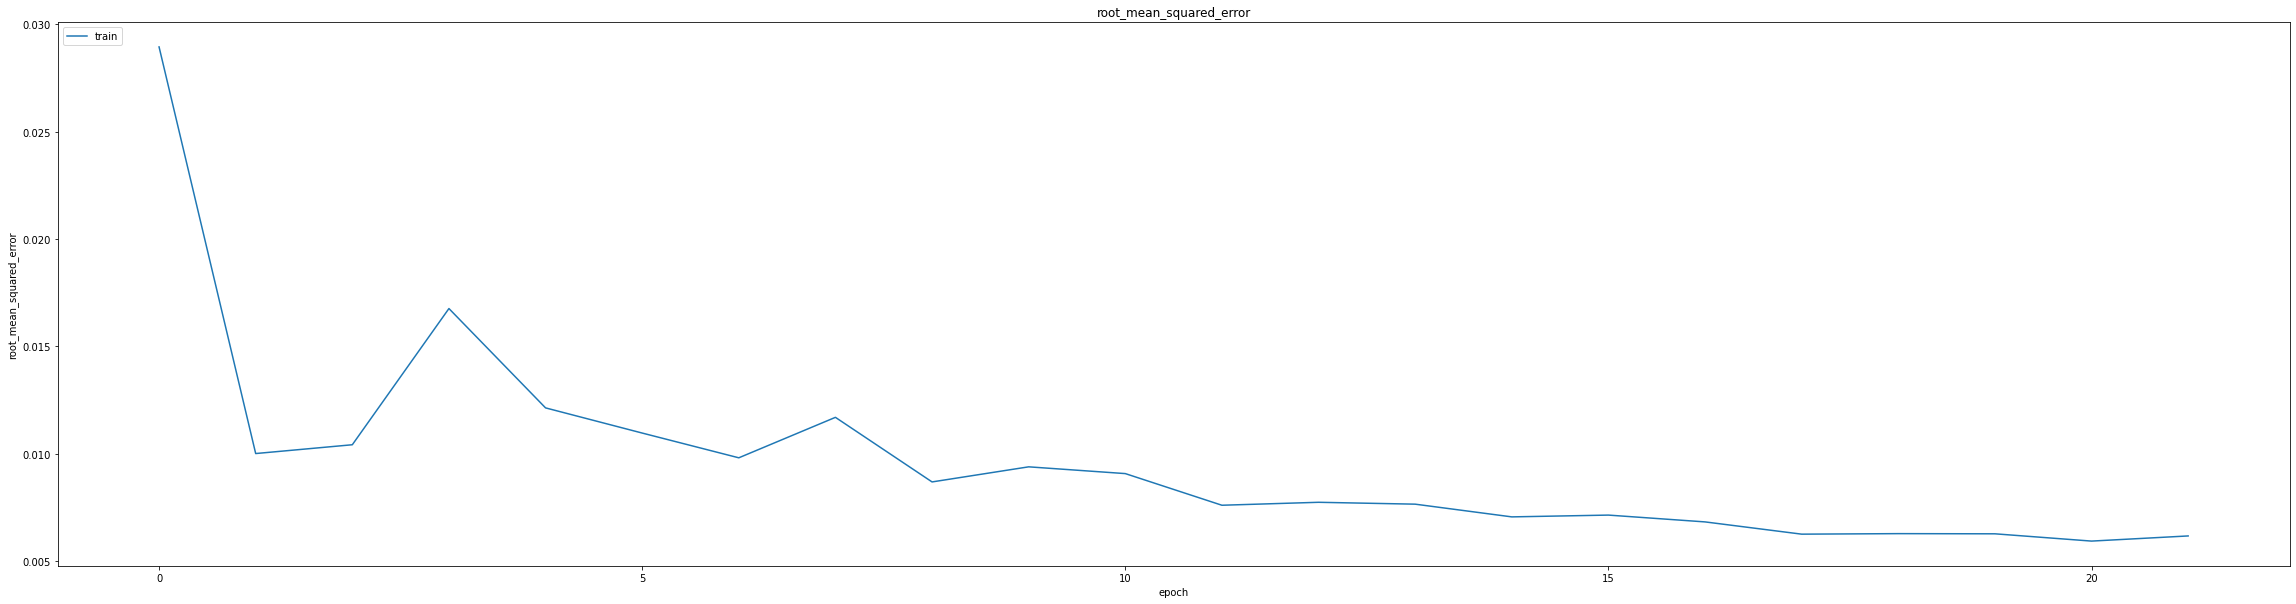

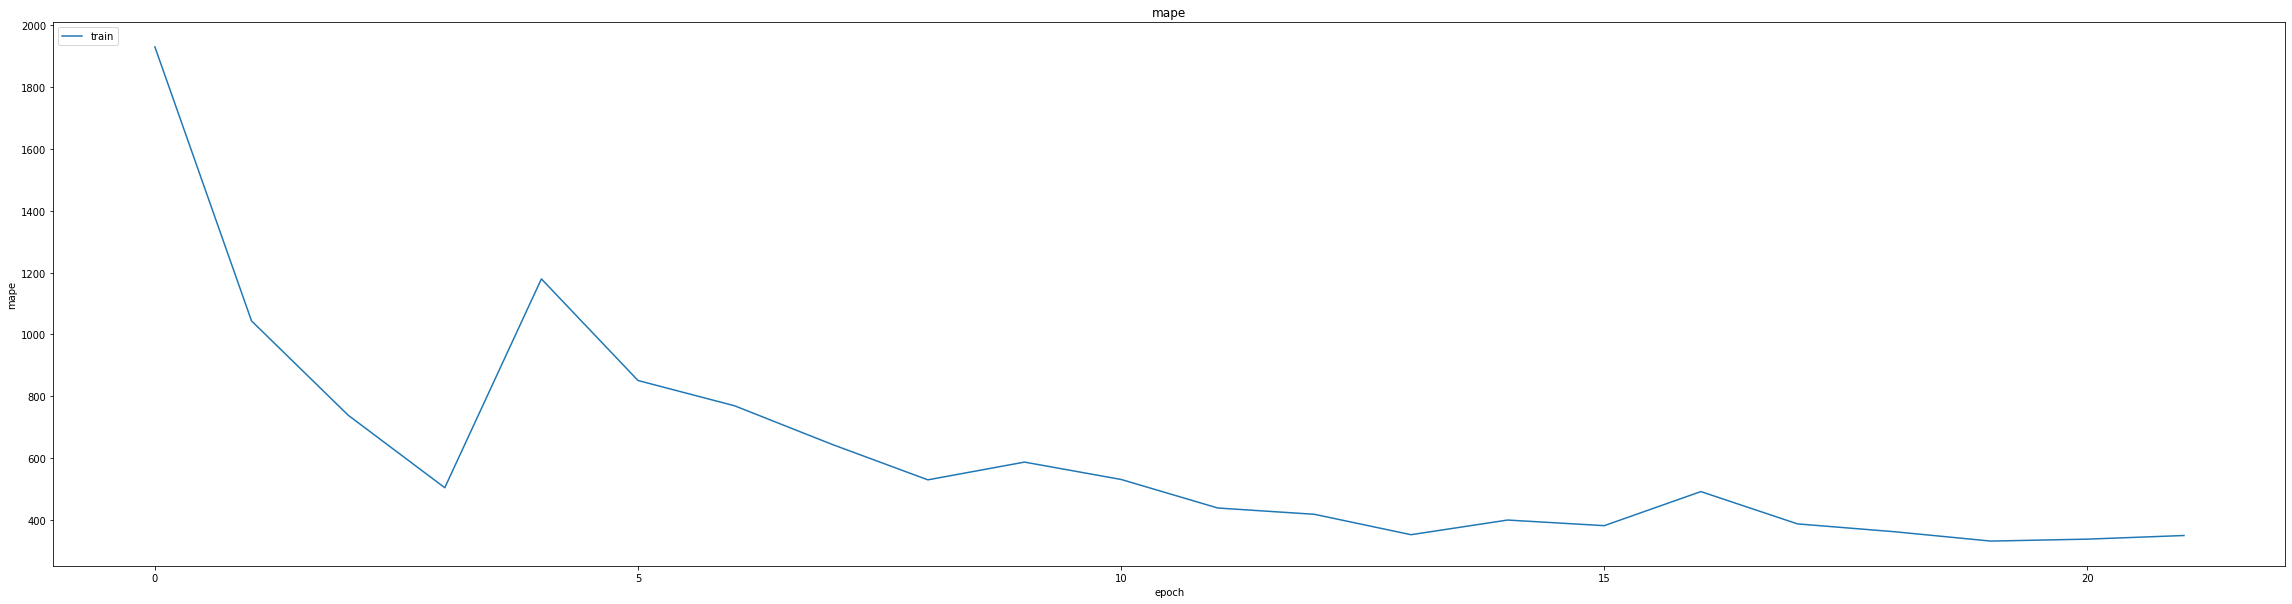

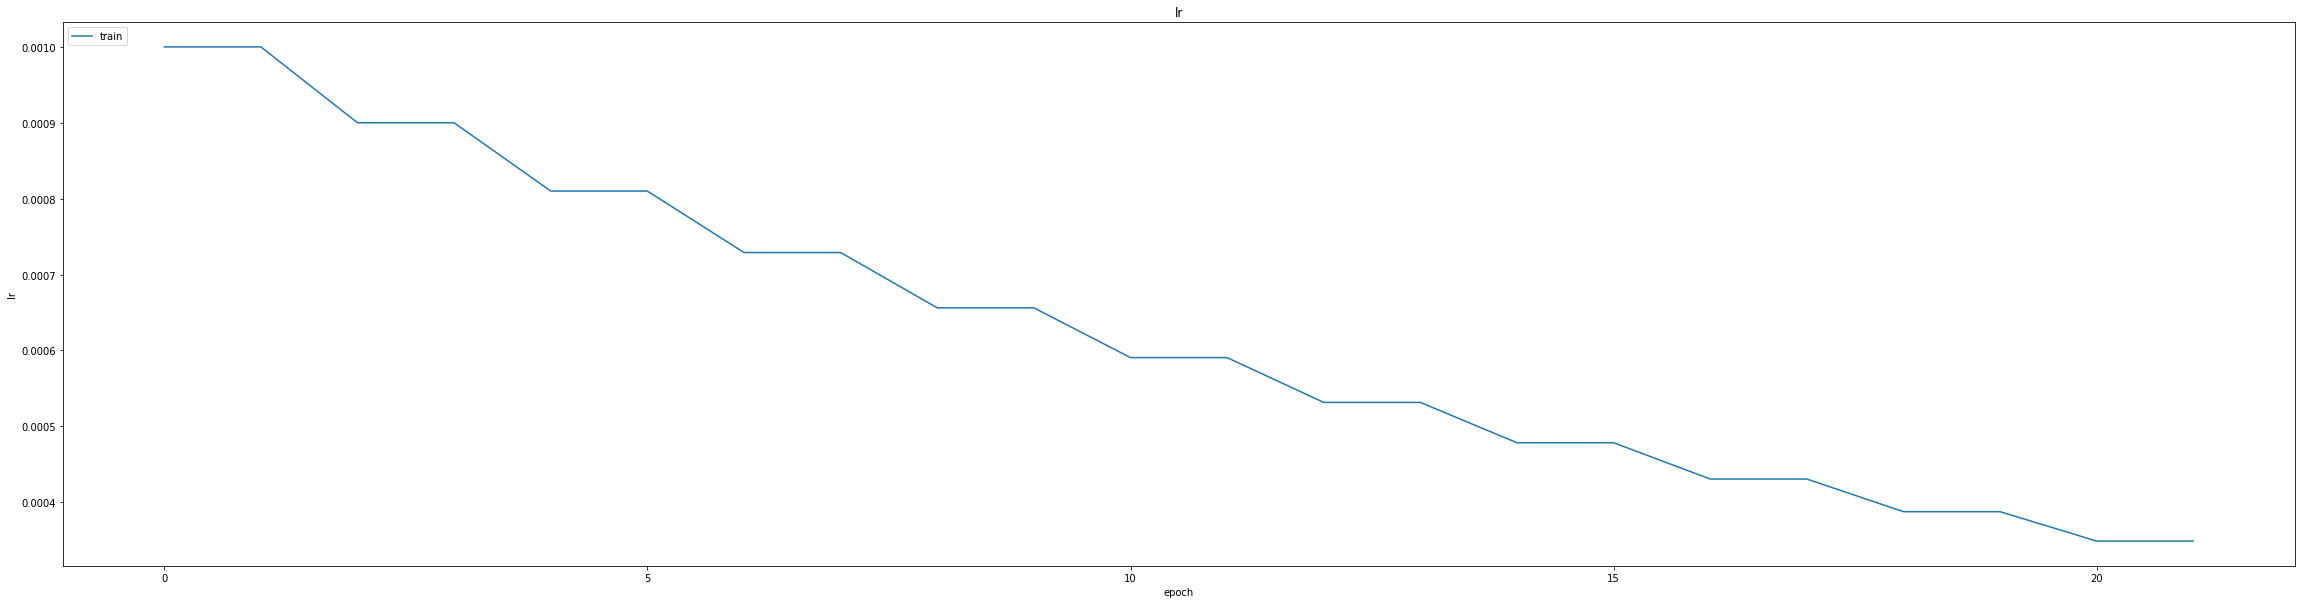

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['var_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.012459971942007542
0.017348840832710266
234/234 [==============================] - 10s 39ms/step
0.9962940951780803


In [ ]:
model.load_weights("weights.best.hdf5")

234/234 [==============================] - 9s 40ms/step


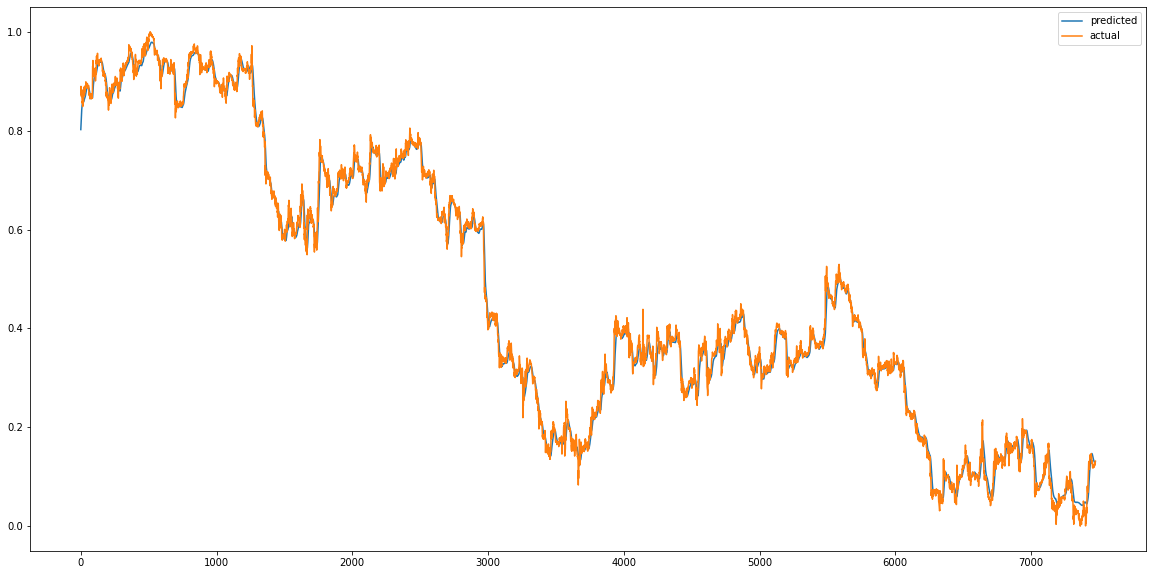

In [ ]:
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


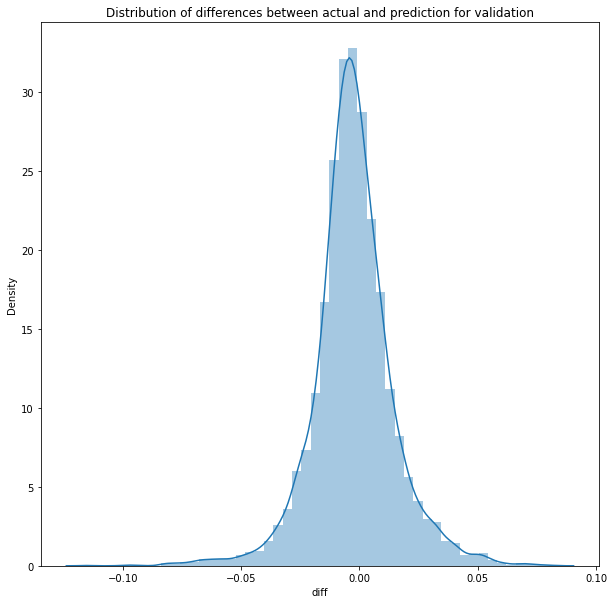

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

230/230 [==============================] - 10s 43ms/step


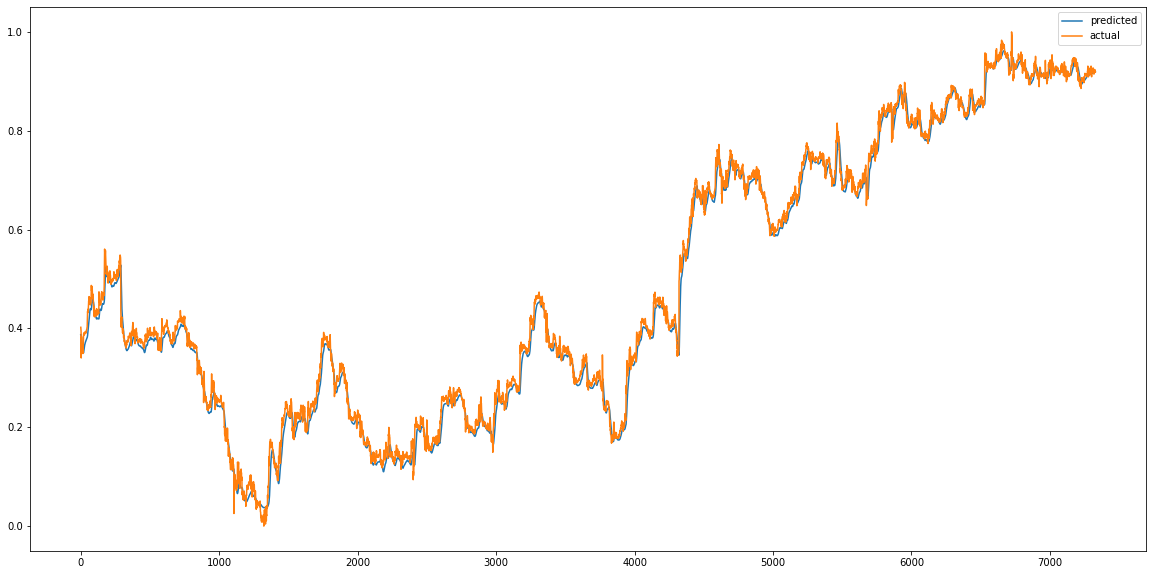

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


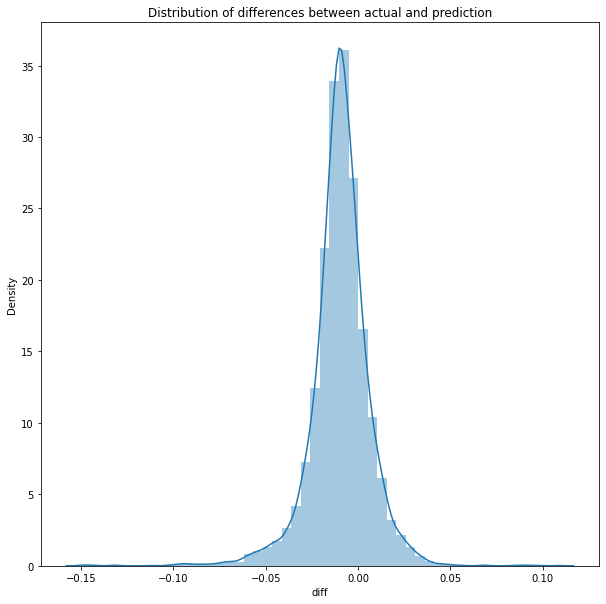

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))
print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))
from math import sqrt

print('RMSE  :', sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

test_r2_scr = thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :',test_r2_scr)


predictions['diff'].describe()

MSE :  0.0003543890289337213
MAE :  0.013912669790260365
RMSE  : 0.018825223210727708
230/230 [==============================] - 9s 39ms/step
R2_Score  : 0.9952885454046311


count    7329.000000
mean       -0.009709
std         0.016130
min        -0.149682
25%        -0.016687
50%        -0.009362
75%        -0.001524
max         0.108442
Name: diff, dtype: float64